In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import geopandas as gpd
import numpy as np
import re

# Combine aact data for annotation

In [3]:
reference_data_new = pd.read_csv("data/raw_aact/combined_neuro_trials_with_interventions_20240313.csv")


In [7]:
unique_rows_new_data = unique_rows_new_data[['nct_id', 'study_official_title', 'brief_summary_description']]
unique_rows_new_data = unique_rows_new_data.drop_duplicates()
#unique_rows_new_data.columns = ['nct_id', 'official_title', 'description']

In [8]:
reference_data_new[reference_data_new['nct_id']== 'NCT02545114']

,nct_id,Neurological Disease,Disease Class,brief_title,study_official_title,brief_summary_description,start_date,completion_date,phase,study_type,overall_status,country_name,intervention_name,intervention_type
170484,NCT02545114,SIADH,Central Nervous System Diseases,Tolvaptan for Patients With Acute Neurological...,Use of Tolvaptan to Treat SIADH-induced Hypona...,Hyponatremia occurs frequently in patients wit...,2015-08-31,2016-09-30,Not Applicable,Interventional,Terminated,United States,Tolvaptan,Drug
170485,NCT02545114,SIADH,Central Nervous System Diseases,Tolvaptan for Patients With Acute Neurological...,Use of Tolvaptan to Treat SIADH-induced Hypona...,Hyponatremia occurs frequently in patients wit...,2015-08-31,2016-09-30,Not Applicable,Interventional,Terminated,United States,Tolvaptan,Drug
170486,NCT02545114,SIADH,Central Nervous System Diseases,Tolvaptan for Patients With Acute Neurological...,Use of Tolvaptan to Treat SIADH-induced Hypona...,Hyponatremia occurs frequently in patients wit...,2015-08-31,2016-09-30,Not Applicable,Interventional,Terminated,United States,Tolvaptan,Drug


In [9]:
unique_rows_new_data.head()

,nct_id,study_official_title,brief_summary_description
6,NCT03060096,Stepped-Care Telehealth for Distress in Cancer...,Mental health issues in post-treatment adult c...
24,NCT05440214,Targeting Emotion Dysregulation to Reduce Suic...,People with psychotic disorders are excluded f...
28,NCT03479970,Rehabilitation of Social Cognition in Subjects...,In the present study the investigators aim to ...
32,NCT04846790,The Effect of a Combined Nature-based and Virt...,Rationale: Healthcare workers that care for pa...
36,NCT02463188,Promoting Sleep to Prevent Substance Use in Ad...,"The goal is to adapt and refine an innovative,..."


In [10]:
unique_rows_new_data.shape

(13573, 3)

In [11]:
unique_rows_new_data['text'] = unique_rows_new_data.apply(lambda row: str(row['study_official_title']) + "| " + str(row['brief_summary_description']) if pd.notnull(row['study_official_title']) else row['brief_summary_description'], axis=1)


In [12]:
unique_rows_new_data.head()

,nct_id,study_official_title,brief_summary_description,text
6,NCT03060096,Stepped-Care Telehealth for Distress in Cancer...,Mental health issues in post-treatment adult c...,Stepped-Care Telehealth for Distress in Cancer...
24,NCT05440214,Targeting Emotion Dysregulation to Reduce Suic...,People with psychotic disorders are excluded f...,Targeting Emotion Dysregulation to Reduce Suic...
28,NCT03479970,Rehabilitation of Social Cognition in Subjects...,In the present study the investigators aim to ...,Rehabilitation of Social Cognition in Subjects...
32,NCT04846790,The Effect of a Combined Nature-based and Virt...,Rationale: Healthcare workers that care for pa...,The Effect of a Combined Nature-based and Virt...
36,NCT02463188,Promoting Sleep to Prevent Substance Use in Ad...,"The goal is to adapt and refine an innovative,...",Promoting Sleep to Prevent Substance Use in Ad...


In [13]:
unique_rows_new_data.to_csv(f"data/neuro_trials_to_annotate_{len(unique_rows_new_data)}.csv")

# Load annotated data

In [14]:
norm_annotations = pd.read_csv('data/annotated_aact/normalized_annotations_unique_19607.csv', index_col=False)
norm_annotations.head(5)

,Unnamed: 0,nct_id,canonical_BioLinkBERT-base_interventions,canonical_aact_interventions,aact_intervention_types,canonical_BioLinkBERT-base_conditions,canonical_aact_conditions,Disease Class
0,0,NCT00000117,intravenous immunoglobulin|ivig,immunoglobulin,Drug,multiple sclerosis|optic neuritis,optic neuritis,Cranial Nerve Diseases
1,1,NCT00000146,corticosteroid,methylprednisolone|prednisone,Drug,multiple sclerosis|optic neuritis,multiple sclerosis|optic neuritis,Cranial Nerve Diseases|Demyelinating Diseases
2,2,NCT00000147,corticosteroid,methylprednisolone|prednisone,Drug,multiple sclerosis|optic neuritis,multiple sclerosis|optic neuritis,Cranial Nerve Diseases|Demyelinating Diseases
3,3,NCT00000151,acetylsalicylic acid|aspirin,aspirin|acetylsalicylic acid,Drug|Procedure,blindness|diabetes mellitus|diabetic retinopat...,diabetic retinopathy|blindness,Neurologic Manifestations|unknown
4,4,NCT00000170,atropine,atropine|,Drug|Device,amblyopia|anisometropia|moderate amblyopia|str...,amblyopia,Neurologic Manifestations


In [18]:
df_normalized_annotations_temp = norm_annotations[['nct_id', 'canonical_BioLinkBERT-base_interventions', 'canonical_BioLinkBERT-base_conditions', 'Disease Class']]

#reference_data_temp = reference_data_new[['nct_id','brief_title','study_official_title', 'brief_summary_description']]
#reference_data_with_target_annotations_temp = df_normalized_annotations_temp.merge(reference_data_temp, on='nct_id', how='left')
#reference_data_with_target_annotations_temp = reference_data_with_target_annotations_temp[['nct_id','brief_title', 'canonical_BioLinkBERT-base_interventions', 'canonical_BioLinkBERT-base_conditions', 'Disease Class', 'brief_summary_description']]

In [19]:
#reference_data_with_target_annotations_temp = reference_data_with_target_annotations_temp.drop_duplicates()
#reference_data_with_target_annotations_temp['study_official_title'] = reference_data_with_target_annotations_temp['study_official_title'].fillna(reference_data_with_target_annotations_temp['brief_title'])
#reference_data_with_target_annotations_temp.head()

In [20]:
#reference_data_with_target_annotations_temp.to_csv('data/annotated_aact/normalized_annotations_unique_19607_with_details.csv')

### Prepare for analysis
NOTE: The reference that in this version contains only the neuro trials, which contained an intervention annotation from BioLinkBERT (DRUG) or AACT

In [92]:
evaluate_bert = False

if not evaluate_bert:
    target_interventions_column = 'canonical_aact_interventions'
    target_conditions_column = 'canonical_aact_conditions'
    annotations_type = 'aact'
else:
    target_interventions_column = 'canonical_BioLinkBERT-base_interventions'
    target_conditions_column = 'canonical_BioLinkBERT-base_conditions'
    annotations_type = 'biolinkbert'

In [93]:
annotations_type

'aact'

In [94]:
df_normalized_annotations = norm_annotations[['nct_id', target_interventions_column, target_conditions_column]]
reference_data_with_target_annotations = df_normalized_annotations.merge(reference_data_new, on='nct_id', how='left')
df_normalized_annotations.head()

,nct_id,canonical_aact_interventions,canonical_aact_conditions
0,NCT00000117,immunoglobulin,optic neuritis
1,NCT00000146,methylprednisolone|prednisone,multiple sclerosis|optic neuritis
2,NCT00000147,methylprednisolone|prednisone,multiple sclerosis|optic neuritis
3,NCT00000151,aspirin|acetylsalicylic acid,diabetic retinopathy|blindness
4,NCT00000170,atropine|,amblyopia


In [95]:
reference_data_with_target_annotations_to_save = reference_data_with_target_annotations[['nct_id','brief_title', 'Neurological Disease', 'Disease Class', 'brief_summary_description']]

In [96]:
reference_data_with_target_annotations_to_save.head()

,nct_id,brief_title,Neurological Disease,Disease Class,brief_summary_description
0,NCT00000117,Intravenous Immunoglobulin Therapy in Optic Ne...,Optic Neuritis,Cranial Nerve Diseases,To determine whether high-dose intravenous imm...
1,NCT00000117,Intravenous Immunoglobulin Therapy in Optic Ne...,Optic Neuritis,Cranial Nerve Diseases,To determine whether high-dose intravenous imm...
2,NCT00000117,Intravenous Immunoglobulin Therapy in Optic Ne...,Optic Neuritis,Cranial Nerve Diseases,To determine whether high-dose intravenous imm...
3,NCT00000146,Optic Neuritis Treatment Trial (ONTT),Multiple Sclerosis,Demyelinating Diseases,To assess the beneficial and adverse effects o...
4,NCT00000146,Optic Neuritis Treatment Trial (ONTT),Multiple Sclerosis,Demyelinating Diseases,To assess the beneficial and adverse effects o...


In [97]:
len(set(reference_data_with_target_annotations['nct_id'])), reference_data_with_target_annotations.shape

(19607, (262551, 16))

In [98]:
# replace the raw aact column with normalized columns
reference_data_with_target_annotations = reference_data_with_target_annotations.drop(columns=['Neurological Disease', 'intervention_name'])

reference_data_with_target_annotations[target_interventions_column] = reference_data_with_target_annotations[target_interventions_column].str.split('|')
reference_data_with_target_annotations[target_conditions_column] = reference_data_with_target_annotations[target_conditions_column].str.split('|')

# Exploding both columns to create new rows for each value
df_exploded_target_annotations = reference_data_with_target_annotations.explode(target_interventions_column)
df_exploded_target_annotations = df_exploded_target_annotations.explode(target_conditions_column)

df_exploded_target_annotations.rename(columns={target_interventions_column: 'intervention_name'}, inplace=True)
df_exploded_target_annotations.rename(columns={target_conditions_column: 'Neurological Disease'}, inplace=True)

reference_data = df_exploded_target_annotations.copy()
# Convert 'start_date' and 'completion_date' to datetime
reference_data['start_date'] = pd.to_datetime(reference_data['start_date'])
reference_data['completion_date'] = pd.to_datetime(reference_data['completion_date'])

# Extract the year from 'start_date' and 'completion_date'
reference_data['start_year'] = reference_data['start_date'].dt.year
reference_data['completion_year'] = reference_data['completion_date'].dt.year

In [99]:
reference_data.shape

(1757647, 16)

In [100]:
len(set(df_normalized_annotations['nct_id'])), df_normalized_annotations.shape

(19607, (19607, 3))

In [101]:
len(set(reference_data['nct_id']))

19607

### Data Quality

In [102]:
df_normalized_annotations_temp = norm_annotations[['nct_id', 'canonical_aact_interventions', 'canonical_BioLinkBERT-base_interventions', 'canonical_aact_conditions', 'canonical_BioLinkBERT-base_conditions']]
df_normalized_sample = df_normalized_annotations_temp.sample(n=50, random_state=42)
df_normalized_sample.to_csv("data/quality_checks/biolinkbert_annotations_sample_50.csv")

In [103]:
df_normalized_annotations_temp[df_normalized_annotations_temp['nct_id']=='NCT02545114']

,nct_id,canonical_aact_interventions,canonical_BioLinkBERT-base_interventions,canonical_aact_conditions,canonical_BioLinkBERT-base_conditions
11197,NCT02545114,tolvaptan,adh antagonist|tolvaptan,hyponatremia|inappropriate adh syndrome,acute brain injury|acute neurological injuries...


### Trial Phase Mining
Check if there is trial information in the text, that can enrich the phase column.

In [104]:
reference_data_phase_mining = reference_data[['nct_id','phase','brief_summary_description']].drop_duplicates()

In [105]:
reference_data_phase_mining.head()

,nct_id,phase,brief_summary_description
0,NCT00000117,Phase 3,To determine whether high-dose intravenous imm...
3,NCT00000146,Phase 3,To assess the beneficial and adverse effects o...
15,NCT00000147,Not Applicable,To assess the beneficial and adverse effects o...
27,NCT00000151,Phase 3,To evaluate the effectiveness of both argon la...
33,NCT00000170,Phase 3,To determine whether the success rate with dru...


In [106]:
reference_data_phase_mining.shape

(19607, 3)

In [107]:
sample_df = reference_data_phase_mining[reference_data_phase_mining['phase'] == 'Not Applicable'].sample(n=20, random_state=42)
sample_df.head()

,nct_id,phase,brief_summary_description
36254,NCT00382824,Not Applicable,The clinical syndrome of PSP responds poorly t...
168815,NCT02642289,Not Applicable,This study evaluates the benefits of probiotic...
117935,NCT01542892,Not Applicable,Several trials have found that nutritional sup...
217762,NCT04327726,Not Applicable,Postdural puncture headache (PDPH) is a common...
244803,NCT05382026,Not Applicable,Canada's Food Guide places an increased emphas...


In [108]:
sample_df.to_csv("data/quality_checks/trials_without_phase_random_20.csv")

In [109]:
# Define function to extract sentences mentioning "phase"
def extract_phase_sentences_v2(text):
    sentences = re.split(r'(?<=[.!?]) +', text)
    # Updated regex to match "phase" followed by a space and a number
    phase_sentences = [sentence for sentence in sentences if re.search(r'\bphase\s+\d', sentence, re.IGNORECASE)]
    return " ".join(phase_sentences)

# Apply the function to the brief_summary_description column
reference_data_phase_mining['phase_mentions'] = reference_data_phase_mining['brief_summary_description'].apply(extract_phase_sentences_v2)


In [110]:
extract_phase_sentences_v2("This is a Phase 3 study for this drug. It lasted five months. We will proceed to phase 1.")

'This is a Phase 3 study for this drug. We will proceed to phase 1.'

In [111]:
reference_data_phase_mining.head()

,nct_id,phase,brief_summary_description,phase_mentions
0,NCT00000117,Phase 3,To determine whether high-dose intravenous imm...,
3,NCT00000146,Phase 3,To assess the beneficial and adverse effects o...,
15,NCT00000147,Not Applicable,To assess the beneficial and adverse effects o...,
27,NCT00000151,Phase 3,To evaluate the effectiveness of both argon la...,
33,NCT00000170,Phase 3,To determine whether the success rate with dru...,


In [112]:
non_empty_count = reference_data_phase_mining['phase_mentions'].apply(lambda x: bool(x.strip())).sum()
non_empty_count

727

In [113]:
df_filtered = reference_data_phase_mining[reference_data_phase_mining['phase_mentions'].str.strip().astype(bool)]
df_filtered_not_applicable = df_filtered[df_filtered["phase"]=="Not Applicable"]

In [114]:
df_filtered_not_applicable

,nct_id,phase,brief_summary_description,phase_mentions
115751,NCT01511614,Not Applicable,Background:\n\n- Smoking is thought to cause c...,Participants must be able to stop smoking for ...
139229,NCT01965405,Not Applicable,In this proposed study with People Living with...,"Phase 1 will last 4 weeks, and will involve br..."
153128,NCT02272010,Not Applicable,"Bipolar disorder (BD) is a chronic, often disa...",Phase 2 will consist of 12 the investigatorsek...
164351,NCT02534454,Not Applicable,The purpose of the phase 1 translational pilot...,The purpose of the phase 1 translational pilot...
176901,NCT02874274,Not Applicable,This is a study to see whether participation i...,This study will evaluate the impact of the HVP...
208946,NCT03959124,Not Applicable,Background: Deep brain stimulation (DBS) is us...,The safety and preliminary efficacy of nucleus...
216521,NCT04261478,Not Applicable,Patients with tandem occlusion or tandem lesio...,Patients with tandem occlusion or tandem lesio...
219489,NCT04399083,Not Applicable,Sleep deprivation (SD) has a powerful degradin...,During Phase 1 a total of 21 healthy participa...
225145,NCT04618783,Not Applicable,This study is a supplementary study of an alre...,This study is a supplementary study of an alre...
237761,NCT05151601,Not Applicable,This research project will investigate if a su...,"Phase 1A is an 8-week randomised, double-blind..."


In [115]:
df_filtered_not_applicable.to_csv("./data/mining_phase_results.csv")

# General
Stats over the common metadata fields for the selected trials.

In [116]:
aact_metadata = reference_data[['nct_id','start_date','completion_date','phase','overall_status','country_name','start_year','completion_year']]


In [117]:
unique_rows_years = aact_metadata.drop_duplicates(subset=['nct_id', 'start_year', 'completion_year'])
unique_rows_years

,nct_id,start_date,completion_date,phase,overall_status,country_name,start_year,completion_year
0,NCT00000117,1995-08-31,1997-12-31,Phase 3,Completed,United States,1995.0,1997.0
3,NCT00000146,1988-07-31,NaT,Phase 3,Unknown status,United States,1988.0,NaN
15,NCT00000147,1988-07-31,NaT,Not Applicable,Unknown status,United States,1988.0,NaN
27,NCT00000151,1979-12-31,NaT,Phase 3,Completed,NaN,1979.0,NaN
33,NCT00000170,1999-04-30,2013-08-31,Phase 3,Completed,United States,1999.0,2013.0
...,...,...,...,...,...,...,...,...
262524,NCT06293911,2024-03-15,2025-07-28,Not Applicable,Not yet recruiting,Italy,2024.0,2025.0
262530,NCT06294236,2024-04-30,2028-03-31,Phase 1,Not yet recruiting,NaN,2024.0,2028.0
262533,NCT06294821,2024-09-30,2028-07-31,Phase 2/Phase 3,Not yet recruiting,NaN,2024.0,2028.0
262539,NCT06296082,2024-05-01,2027-06-30,Phase 2,Not yet recruiting,NaN,2024.0,2027.0


## Phases and Status

In [118]:
# Filter out rows where start_year is not available
df_filtered = aact_metadata.dropna(subset=['start_year'])
df_filtered = df_filtered[['nct_id', 'phase', 'start_year']].drop_duplicates()

df_filtered.shape, len(set(df_filtered['nct_id']))

((19419, 3), 19419)

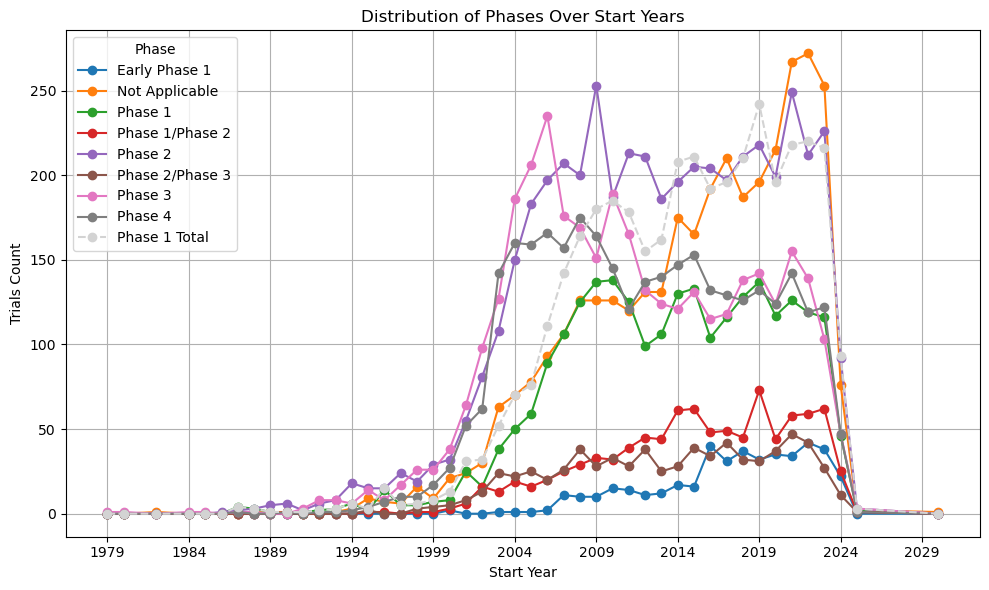

In [119]:
# Group by start_year and phase, count occurrences, and unstack to pivot phase as columns
grouped = df_filtered.groupby(['start_year', 'phase']).size().unstack(fill_value=0)

# Add a new column that sums all columns containing 'Phase 1'
grouped['Phase 1 Total'] = grouped.filter(like='Phase 1').sum(axis=1)

# Convert index to integers
grouped.index = grouped.index.astype(int)

# Plot the line chart with custom colors
ax = grouped.plot(kind='line', marker='o', figsize=(10, 6))

# Customize 'Phase 1 Total' line
ax.lines[-1].set_linestyle('--')
ax.lines[-1].set_color('lightgrey')

# Set the title and labels
plt.title('Distribution of Phases Over Start Years')
plt.xlabel('Start Year')
plt.ylabel('Trials Count')

# Show the plot
plt.legend(title='Phase')
plt.grid(True)
plt.tight_layout()

# Customize x-axis tick labels to show every 5 years
plt.xticks(range(min(grouped.index), max(grouped.index)+1, 5))

plt.savefig("viz/metadata/trial_phase_over_time.png")
plt.show()

19607


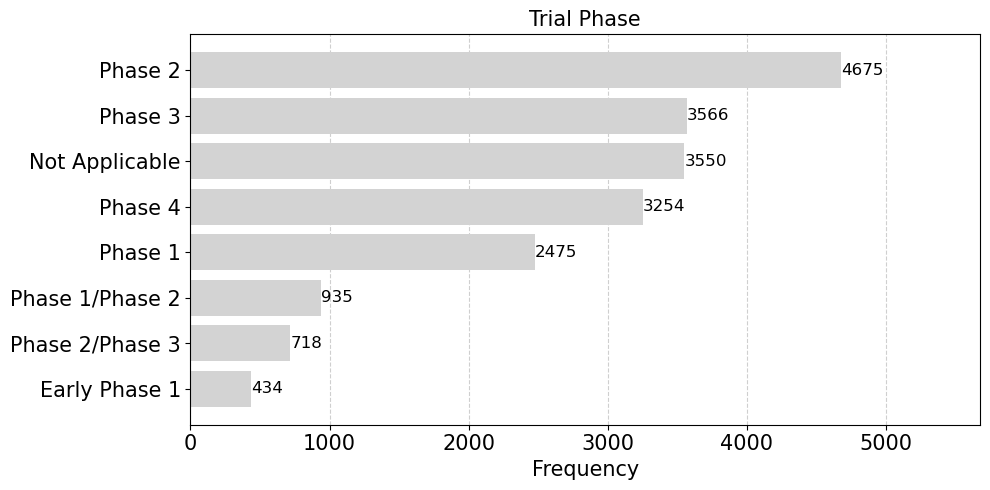

In [120]:
# Keeping only unique nct_id, phase pairs
unique_pairs_phase = aact_metadata[['nct_id', 'phase']].drop_duplicates()

# Counting the number of nct_ids per phase type
phase_type_counts = unique_pairs_phase['phase'].value_counts()
phase_type_counts = phase_type_counts.sort_values(ascending=True)
print(sum(phase_type_counts))

# Create a horizontal bar chart for the top 10 data types
plt.figure(figsize=(10, 5))
bars = plt.barh(phase_type_counts.index, phase_type_counts, color='lightgrey',zorder=2)

# Add labels to each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, f'{width}', va='center', fontsize=12)
    
plt.tick_params(axis='y', labelsize=15)
plt.tick_params(axis='x', labelsize=15)
plt.grid(axis='x', linestyle='--', alpha=0.6, zorder=1)
plt.xlabel('Frequency', fontsize=15)
plt.title('Trial Phase', fontsize=15)
plt.xlim(0, max(phase_type_counts)+1000) # Adjusted to max count for relevancy
plt.tight_layout()

# Save the plot to a local folder
plt.savefig(f'viz/metadata/trial_phase_frequency.png')

# Display the chart
plt.show()

19607


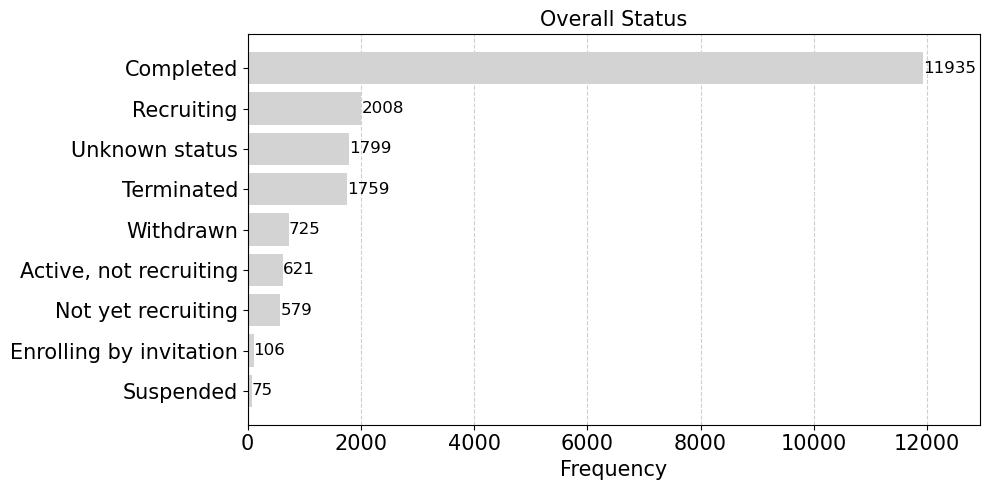

In [121]:
# Keeping only unique nct_id, phase pairs
unique_pairs_phase = aact_metadata[['nct_id', 'overall_status']].drop_duplicates()

# Counting the number of nct_ids per phase type
phase_type_counts = unique_pairs_phase['overall_status'].value_counts()
phase_type_counts = phase_type_counts.sort_values(ascending=True)
print(sum(phase_type_counts))

# Create a horizontal bar chart for the top 10 data types
plt.figure(figsize=(10, 5))
bars = plt.barh(phase_type_counts.index, phase_type_counts, color='lightgrey',zorder=2)

# Add labels to each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, f'{width}', va='center', fontsize=12)
    
plt.tick_params(axis='y', labelsize=15)
plt.tick_params(axis='x', labelsize=15)
plt.grid(axis='x', linestyle='--', alpha=0.6, zorder=1)
plt.xlabel('Frequency', fontsize=15)
plt.title('Overall Status', fontsize=15)
plt.xlim(0, max(phase_type_counts)+1000) # Adjusted to max count for relevancy
plt.tight_layout()

# Save the plot to a local folder
plt.savefig(f'viz/metadata/trial_status_frequency.png')

# Display the chart
plt.show()

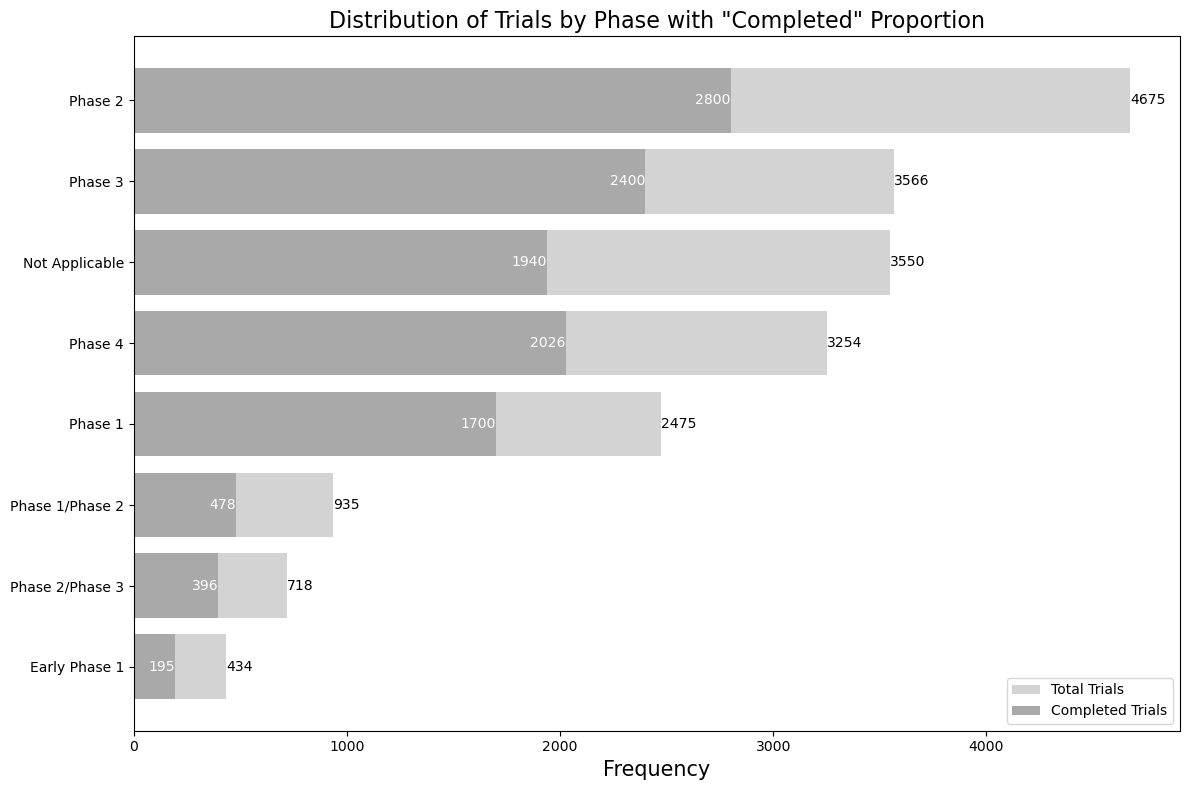

In [122]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming aact_metadata is your DataFrame

# Step 1: Count total trials per phase, ensuring unique nct_id within each phase
total_phase_counts = aact_metadata[['nct_id', 'phase']].drop_duplicates()['phase'].value_counts()

# Step 2: Filter 'Completed' status and count completed trials per phase, ensuring unique nct_id
completed_trials = aact_metadata[aact_metadata['overall_status'] == 'Completed']
completed_phase_counts = completed_trials[['nct_id', 'phase']].drop_duplicates()['phase'].value_counts()

# Sorting total_phase_counts in descending order to determine plot order
sorted_phases = total_phase_counts.sort_values(ascending=True).index

# Reindexing completed_phase_counts according to sorted_phases for alignment
completed_phase_counts = completed_phase_counts.reindex(index=sorted_phases).fillna(0)

# Step 3: Plot a horizontal stacked bar chart
plt.figure(figsize=(12, 8))

# Plotting total trials
bars_total = plt.barh(sorted_phases, total_phase_counts.reindex(index=sorted_phases), color='lightgrey', label='Total Trials')

# Plotting completed trials on top of the total trials
bars_completed = plt.barh(sorted_phases, completed_phase_counts, color='darkgrey', label='Completed Trials')

plt.xlabel('Frequency', fontsize=15)
plt.title('Distribution of Trials by Phase with "Completed" Proportion', fontsize=16)
plt.legend()

# Adding labels to the bars
for bar in bars_total:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{int(bar.get_width())}', va='center', ha='left')

for bar in bars_completed:
    width = bar.get_width()
    # Only label the bar if the width is significant to avoid clutter
    if width > 0:
        plt.text(width, bar.get_y() + bar.get_height() / 2, f'{int(width)}', va='center', ha='right', color='white')

plt.tight_layout()
# Save the plot to a local folder
plt.savefig(f'viz/metadata/trial_phase_with_status_frequency.png')

plt.show()


## Start and Completion Years

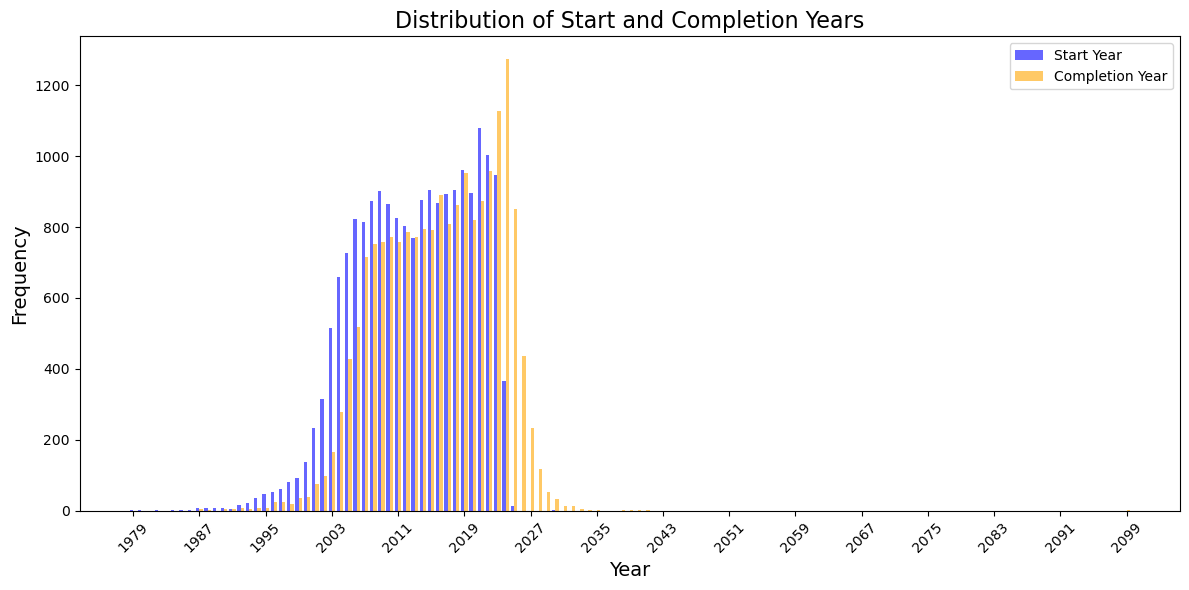

In [123]:
import pandas as pd
import matplotlib.pyplot as plt

# Example DataFrame creation (replace this with your actual DataFrame)
# unique_rows_years = pd.DataFrame({
#     'start_year': [2001, 2002, 2003, 2004, 2005, 2001, 2002, 2003],
#     'completion_year': [2002, 2003, 2004, 2005, 2006, 2002, 2003, 2004]
# })

# Calculating the distribution of start and completion years
start_year_distribution = unique_rows_years['start_year'].value_counts().sort_index()
completion_year_distribution = unique_rows_years['completion_year'].value_counts().sort_index()

# Ensure year values are integers and calculate the range for x-ticks
start_min_year = int(unique_rows_years['start_year'].min())
start_max_year = int(unique_rows_years['start_year'].max())
completion_min_year = int(unique_rows_years['completion_year'].min())
completion_max_year = int(unique_rows_years['completion_year'].max())

# Calculate the range of years to include in the plot
year_range = range(min(start_min_year, completion_min_year), max(start_max_year, completion_max_year) + 1)

# Adjusting the plotting code for improved year readability
plt.figure(figsize=(12, 6))

# Plotting both distributions with adjusted years for x-ticks
plt.bar(start_year_distribution.index - 0.2, start_year_distribution, color='blue', width=0.4, label='Start Year', alpha=0.6)
plt.bar(completion_year_distribution.index + 0.2, completion_year_distribution, color='orange', width=0.4, label='Completion Year', alpha=0.6)

plt.xlabel('Year', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Start and Completion Years', fontsize=16)

# Calculating the tick step based on the range of years to ensure readability
tick_step = max(1, len(year_range) // 15)  # Ensuring at least one tick step and not more than 15 labels for readability

# Apply the calculated tick step to x-ticks
plt.xticks(ticks=[year for i, year in enumerate(year_range) if i % tick_step == 0], rotation=45)

plt.legend()
plt.tight_layout()

# Displaying the plot with adjusted x-axis ticks for better readability
plt.show()


## Countries

In [124]:
country_event_frequency = aact_metadata.groupby('country_name')['nct_id'].nunique().reset_index(name='Frequency')
country_event_frequency

,country_name,Frequency
0,Albania,2
1,Angola,1
2,Antigua and Barbuda,11
3,Argentina,288
4,Armenia,4
...,...,...
136,Venezuela,14
137,Vietnam,26
138,Virgin Islands (U.S.),2
139,Zambia,3


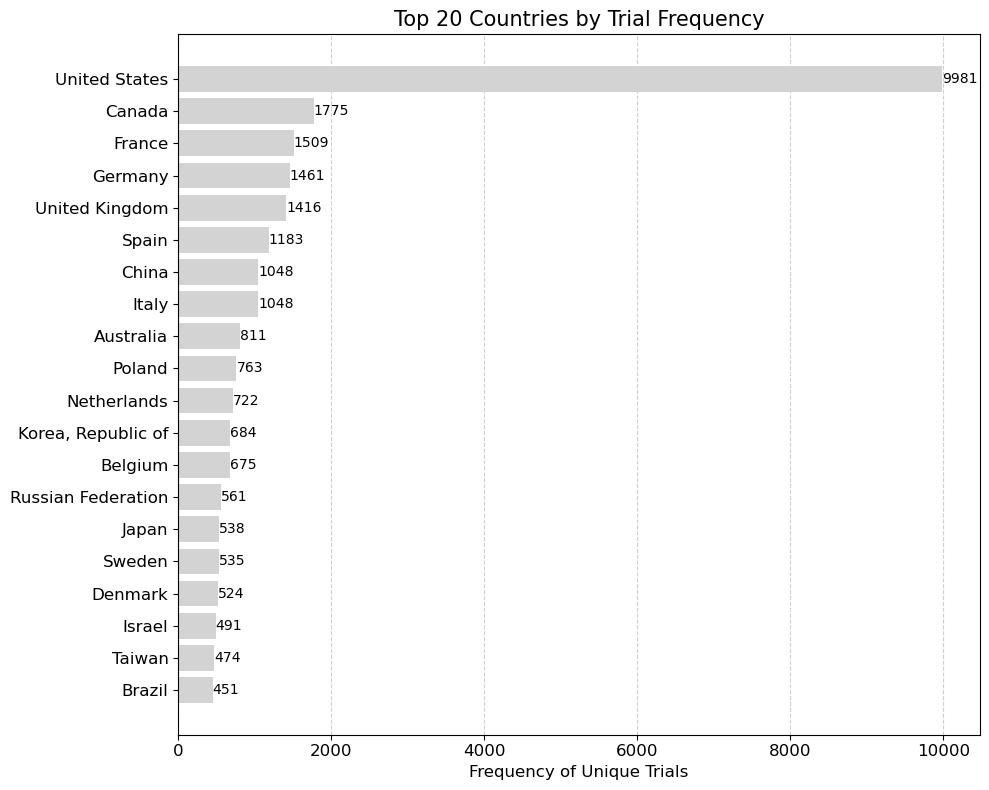

In [125]:
# Sorting the data by Frequency and selecting the top 20
extended_country_event_frequency_sorted = country_event_frequency.sort_values(by='Frequency', ascending=True).tail(20)

# Plotting the top 20 countries
plt.figure(figsize=(10, 8))
bars = plt.barh(extended_country_event_frequency_sorted['country_name'], extended_country_event_frequency_sorted['Frequency'], color='lightgrey', zorder=2)

# Add labels to each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, f'{width}', va='center', fontsize=10)
    
plt.tick_params(axis='y', labelsize=12)
plt.tick_params(axis='x', labelsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6, zorder=1)
plt.xlabel('Frequency of Unique Trials', fontsize=12)
plt.title('Top 20 Countries by Trial Frequency', fontsize=15)
plt.tight_layout()
plt.savefig(f'viz/metadata/trial_contry_frequency.png')

# Display the chart
plt.show()

/var/folders/nd/2fzvhsh510gbt9x6z5pdb1gr0000gn/T/ipykernel_51075/3350954760.py:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


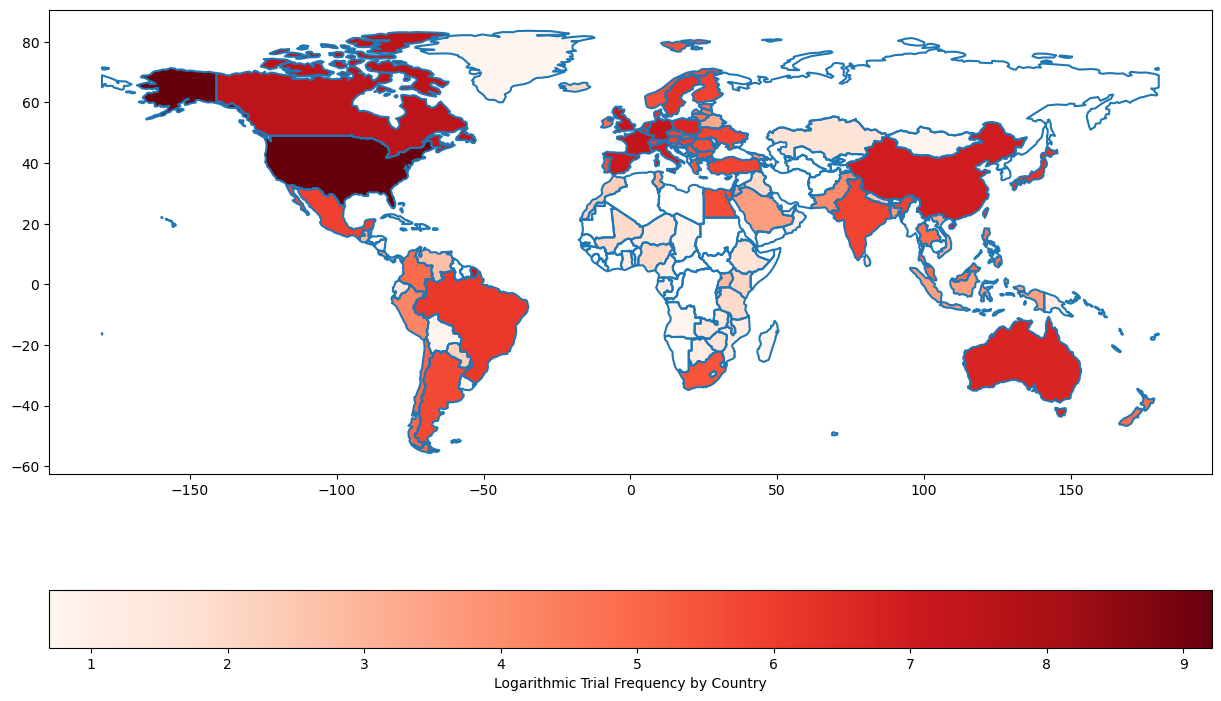

In [126]:
# Convert dictionary to DataFrame
event_df = country_event_frequency
event_df['country_name'] = event_df['country_name'].replace({'United States': 'United States of America'})

# Load world map and remove Antarctica
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world[world['name'] != 'Antarctica']  # Exclude Antarctica

# Merge the world map with event data
world = world.merge(event_df, how="left", left_on="name", right_on="country_name")

# Apply a logarithmic transformation to the 'Frequency' column to deal with wide ranges in data
world['Log_Frequency'] = np.log1p(world['Frequency'])

# Plotting with handling zeros as missing data (leaving them white)
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax)

# Ensure that areas with zero (log1p(0) = 0) are left white by treating them as NaN
world['Log_Frequency'] = world['Log_Frequency'].replace(0, np.nan)

# Plot using the transformed 'Log_Frequency' column
# Setting missing_kwds to ensure NaN values (including those originally zeros) are plotted as white
world.plot(column='Log_Frequency', ax=ax, legend=True,
           missing_kwds={'color': 'white'},
           cmap='Reds',  # Use a red gradient color map
           legend_kwds={'label': "Logarithmic Trial Frequency by Country",
                        'orientation': "horizontal"})

plt.savefig(f'viz/metadata/trial_contry_frequency_map.png')

plt.show()


# Diseases

In [127]:
annotations_type

'aact'

In [128]:
reference_data.head(5)

,nct_id,intervention_name,Neurological Disease,Disease Class,brief_title,study_official_title,brief_summary_description,start_date,completion_date,phase,study_type,overall_status,country_name,intervention_type,start_year,completion_year
0,NCT00000117,immunoglobulin,optic neuritis,Cranial Nerve Diseases,Intravenous Immunoglobulin Therapy in Optic Ne...,NaN,To determine whether high-dose intravenous imm...,1995-08-31,1997-12-31,Phase 3,Interventional,Completed,United States,Drug,1995.0,1997.0
1,NCT00000117,immunoglobulin,optic neuritis,Cranial Nerve Diseases,Intravenous Immunoglobulin Therapy in Optic Ne...,NaN,To determine whether high-dose intravenous imm...,1995-08-31,1997-12-31,Phase 3,Interventional,Completed,United States,Drug,1995.0,1997.0
2,NCT00000117,immunoglobulin,optic neuritis,Cranial Nerve Diseases,Intravenous Immunoglobulin Therapy in Optic Ne...,NaN,To determine whether high-dose intravenous imm...,1995-08-31,1997-12-31,Phase 3,Interventional,Completed,United States,Drug,1995.0,1997.0
3,NCT00000146,methylprednisolone,multiple sclerosis,Demyelinating Diseases,Optic Neuritis Treatment Trial (ONTT),NaN,To assess the beneficial and adverse effects o...,1988-07-31,NaT,Phase 3,Interventional,Unknown status,United States,Drug,1988.0,NaN
3,NCT00000146,methylprednisolone,optic neuritis,Demyelinating Diseases,Optic Neuritis Treatment Trial (ONTT),NaN,To assess the beneficial and adverse effects o...,1988-07-31,NaT,Phase 3,Interventional,Unknown status,United States,Drug,1988.0,NaN


In [129]:
reference_data.columns

Index(['nct_id', 'intervention_name', 'Neurological Disease', 'Disease Class',
       'brief_title', 'study_official_title', 'brief_summary_description',
       'start_date', 'completion_date', 'phase', 'study_type',
       'overall_status', 'country_name', 'intervention_type', 'start_year',
       'completion_year'],
      dtype='object')

In [130]:
aact_diseases = reference_data[['nct_id', 'Neurological Disease', 'Disease Class', 'phase', 'overall_status','start_year','completion_year']]

In [131]:
aact_diseases[aact_diseases['Neurological Disease']=='depression']

,nct_id,Neurological Disease,Disease Class,phase,overall_status,start_year,completion_year
474,NCT00000367,depression,Psychiatry and Psychology Category,Not Applicable,Completed,1998.0,2003.0
474,NCT00000367,depression,Psychiatry and Psychology Category,Not Applicable,Completed,1998.0,2003.0
475,NCT00000367,depression,Psychiatry and Psychology Category,Not Applicable,Completed,1998.0,2003.0
475,NCT00000367,depression,Psychiatry and Psychology Category,Not Applicable,Completed,1998.0,2003.0
476,NCT00000367,depression,Psychiatry and Psychology Category,Not Applicable,Completed,1998.0,2003.0
...,...,...,...,...,...,...,...
262495,NCT06291467,depression,Psychiatry and Psychology Category,Not Applicable,Not yet recruiting,2024.0,2026.0
262496,NCT06291467,depression,Psychiatry and Psychology Category,Not Applicable,Not yet recruiting,2024.0,2026.0
262497,NCT06291467,depression,Psychiatry and Psychology Category,Not Applicable,Not yet recruiting,2024.0,2026.0
262498,NCT06291467,depression,Psychiatry and Psychology Category,Not Applicable,Not yet recruiting,2024.0,2026.0


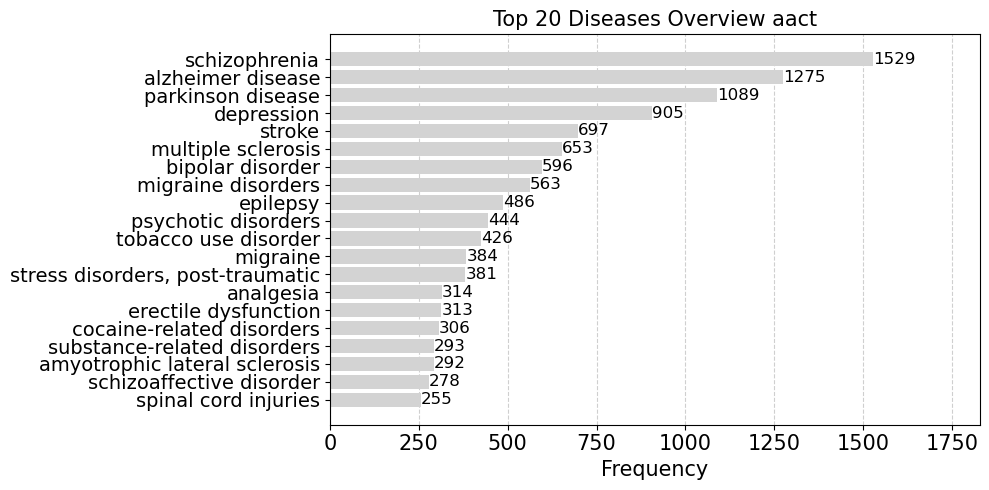

In [132]:
# Keeping only unique nct_id, phase pairs
unique_pairs = aact_diseases[['nct_id', 'Neurological Disease']].drop_duplicates()

# Counting the number of nct_ids per phase type
phase_type_counts = unique_pairs['Neurological Disease'].value_counts()
phase_type_counts = phase_type_counts.sort_values(ascending=True).tail(20)

# Create a horizontal bar chart for the top 10 data types
plt.figure(figsize=(10, 5))
bars = plt.barh(phase_type_counts.index, phase_type_counts, color='lightgrey',zorder=2)

# Add labels to each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, f'{width}', va='center', fontsize=12)
    
plt.tick_params(axis='y', labelsize=14)
plt.tick_params(axis='x', labelsize=15)
plt.grid(axis='x', linestyle='--', alpha=0.6, zorder=1)
plt.xlabel('Frequency', fontsize=15)
plt.title(f'Top 20 Diseases Overview {annotations_type}', fontsize=15)
plt.xlim(0, max(phase_type_counts)+300) # Adjusted to max count for relevancy
plt.tight_layout()

# Save the plot to a local folder
plt.savefig(f'viz/disease_frequency_{annotations_type}.png')

# Display the chart
plt.show()

## Disease/ All and Completed Trials

In [133]:
# Step 1: Count total trials per disease
total_disease_counts = aact_diseases[['nct_id', 'Neurological Disease']].drop_duplicates()['Neurological Disease'].value_counts()

# Filter 'Completed' status and count completed trials per disease
completed_trials = aact_diseases[aact_diseases['overall_status'] == 'Completed']
completed_disease_counts = completed_trials[['nct_id', 'Neurological Disease']].drop_duplicates()['Neurological Disease'].value_counts()

# Calculate proportions of completed trials
completed_proportions = (completed_disease_counts / total_disease_counts).fillna(0) * 100  # Proportion in percentage

# Sorting to get top 20 diseases by total count
sorted_diseases = total_disease_counts.sort_values(ascending=True).tail(20)
sorted_completed_proportions = completed_proportions.reindex(index=sorted_diseases.index)
sorted_completed_proportions

Neurological Disease
spinal cord injuries                52.156863
schizoaffective disorder            76.618705
amyotrophic lateral sclerosis       54.452055
substance-related disorders         73.378840
cocaine-related disorders           78.104575
erectile dysfunction                72.843450
analgesia                           47.770701
stress disorders, post-traumatic    50.393701
migraine                            66.145833
tobacco use disorder                75.352113
psychotic disorders                 72.297297
epilepsy                            73.662551
migraine disorders                  67.495560
bipolar disorder                    71.308725
multiple sclerosis                  57.580398
stroke                              53.371593
depression                          62.762431
parkinson disease                   63.360882
alzheimer disease                   61.725490
schizophrenia                       73.185088
Name: count, dtype: float64

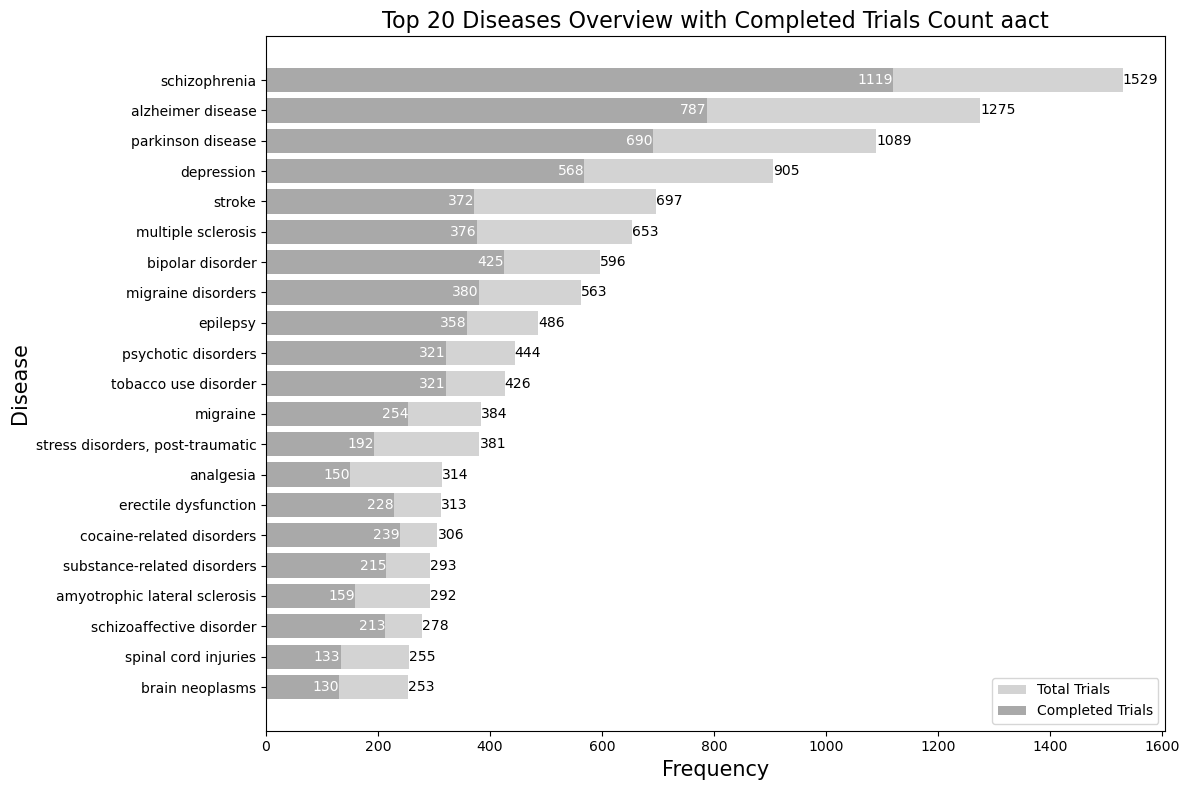

In [134]:
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Count total trials per disease, ensuring unique nct_id within each disease
total_disease_counts = aact_diseases[['nct_id', 'Neurological Disease']].drop_duplicates()['Neurological Disease'].value_counts()

# Step 2: Filter 'Completed' status and count completed trials per disease, ensuring unique nct_id
completed_trials = aact_diseases[aact_diseases['overall_status'] == 'Completed']
completed_disease_counts = completed_trials[['nct_id', 'Neurological Disease']].drop_duplicates()['Neurological Disease'].value_counts()

# Sorting total_disease_counts in descending order to determine plot order and select top diseases
sorted_diseases = total_disease_counts.sort_values(ascending=True).tail(21).index

# Reindexing completed_disease_counts according to sorted_diseases for alignment
completed_disease_counts = completed_disease_counts.reindex(index=sorted_diseases).fillna(0)

# Step 3: Plot a horizontal bar chart
plt.figure(figsize=(12, 8))

# Plotting total trials
bars_total = plt.barh(sorted_diseases, total_disease_counts[sorted_diseases], color='lightgrey', label='Total Trials')

# Plotting completed trials
bars_completed = plt.barh(sorted_diseases, completed_disease_counts[sorted_diseases], color='darkgrey', label='Completed Trials')

plt.ylabel('Disease', fontsize=15)
plt.xlabel('Frequency', fontsize=15)
plt.title(f'Top 20 Diseases Overview with Completed Trials Count {annotations_type}', fontsize=16)
plt.yticks(ticks=range(len(sorted_diseases)), labels=sorted_diseases)
plt.legend()

# Adding labels to the bars
for bar in bars_total:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{int(bar.get_width())}', va='center', ha='left')

for bar in bars_completed:
    width = bar.get_width()
    # Only label the bar if the width is significant to avoid clutter
    if width > 0:
        plt.text(width, bar.get_y() + bar.get_height() / 2, f'{int(width)}', va='center', ha='right', color='white')

plt.tight_layout()
plt.savefig(f'viz/disease_frequency_with_completed_{annotations_type}.png')

plt.show()


## Disease/ Phase

In [135]:
# Aggregate trials by disease and phase, counting unique nct_ids
disease_phase_counts = aact_diseases.groupby(['Neurological Disease', 'phase'])['nct_id'].nunique().reset_index()

# Pivot the data to have diseases as rows and phases as columns, filling missing values with 0
pivot_df = disease_phase_counts.pivot(index='Neurological Disease', columns='phase', values='nct_id').fillna(0)

# Calculate total trials per disease to identify the top 20 diseases
pivot_df['Total Trials'] = pivot_df.sum(axis=1)
top_20_diseases = pivot_df.sort_values('Total Trials', ascending=False).head(21)
top_20_diseases

phase,Early Phase 1,Not Applicable,Phase 1,Phase 1/Phase 2,Phase 2,Phase 2/Phase 3,Phase 3,Phase 4,Total Trials
Neurological Disease,,,,,,,,,
schizophrenia,16.0,191.0,245.0,40.0,258.0,39.0,340.0,400.0,1529.0
alzheimer disease,38.0,108.0,337.0,61.0,392.0,31.0,207.0,101.0,1275.0
parkinson disease,23.0,116.0,225.0,63.0,322.0,36.0,168.0,136.0,1089.0
depression,27.0,250.0,80.0,20.0,143.0,32.0,116.0,237.0,905.0
stroke,11.0,155.0,50.0,25.0,141.0,38.0,149.0,128.0,697.0
multiple sclerosis,11.0,65.0,96.0,49.0,150.0,26.0,144.0,112.0,653.0
bipolar disorder,9.0,80.0,33.0,12.0,88.0,11.0,170.0,193.0,596.0
migraine disorders,3.0,112.0,71.0,8.0,83.0,11.0,165.0,110.0,563.0
epilepsy,6.0,59.0,75.0,11.0,97.0,5.0,147.0,86.0,486.0


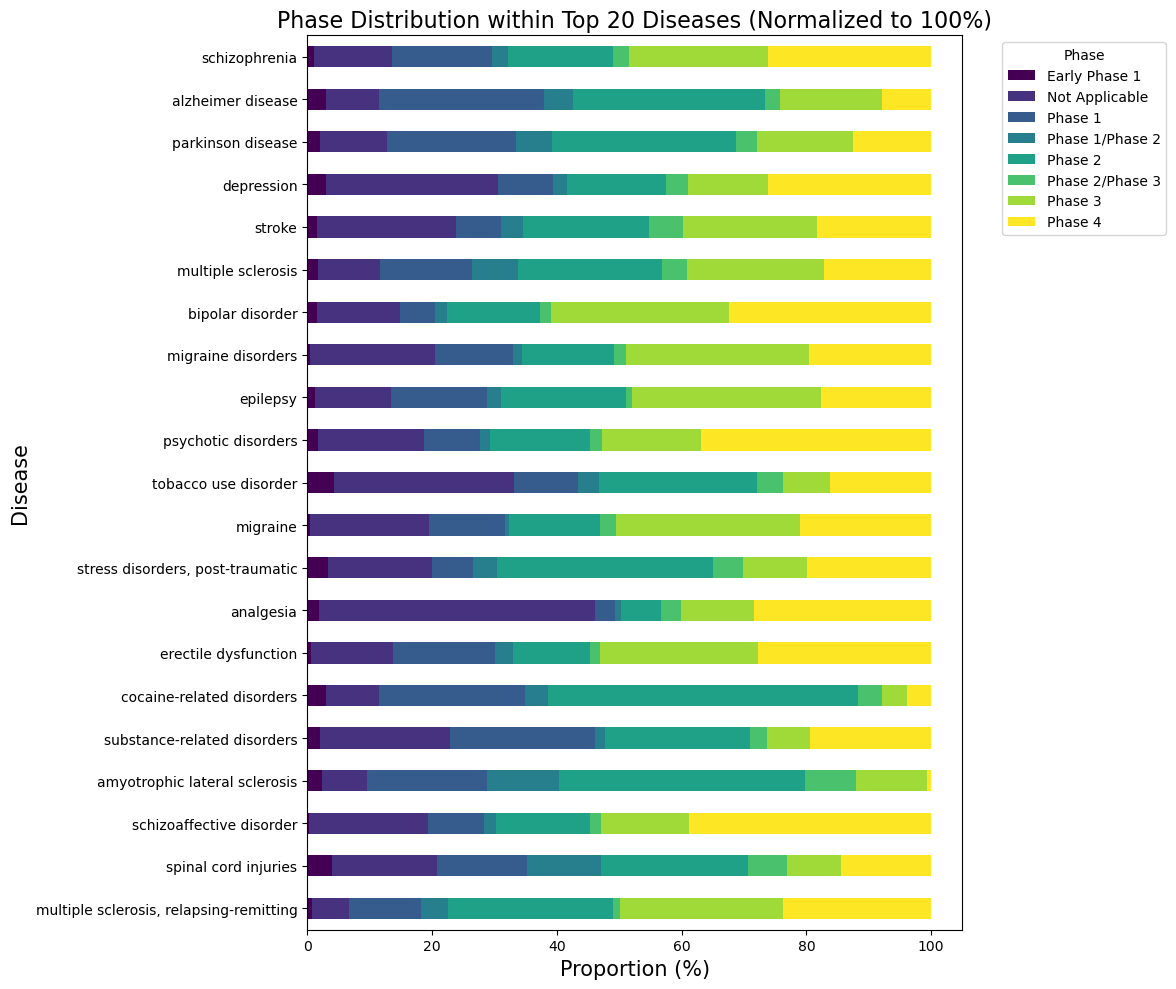

In [136]:
# Aggregate trials by disease and phase, counting unique nct_ids
disease_phase_counts = aact_diseases.groupby(['Neurological Disease', 'phase'])['nct_id'].nunique().reset_index()

# Pivot the data to have diseases as rows and phases as columns, filling missing values with 0
pivot_df = disease_phase_counts.pivot(index='Neurological Disease', columns='phase', values='nct_id').fillna(0)

# Calculate total trials per disease to identify the top 20 diseases
pivot_df['Total Trials'] = pivot_df.sum(axis=1)
top_20_diseases = pivot_df.sort_values('Total Trials', ascending=False).head(21)

# Drop the 'Total Trials' column as it's no longer needed for plotting
top_20_diseases = top_20_diseases.drop(columns='Total Trials')

# Normalize phase counts to proportions within each disease
normalized_phases = top_20_diseases.div(top_20_diseases.sum(axis=1), axis=0) * 100

# Reverse the row order of normalized_phases to have the largest on top
normalized_phases_reversed = normalized_phases.iloc[::-1]

# Plotting with the reversed DataFrame
fig, ax = plt.subplots(figsize=(12, 10))
normalized_phases_reversed.plot(kind='barh', stacked=True, ax=ax, colormap='viridis', edgecolor='none')

plt.xlabel('Proportion (%)', fontsize=15)
plt.ylabel('Disease', fontsize=15)
plt.title('Phase Distribution within Top 20 Diseases (Normalized to 100%)', fontsize=16)
plt.legend(title='Phase', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

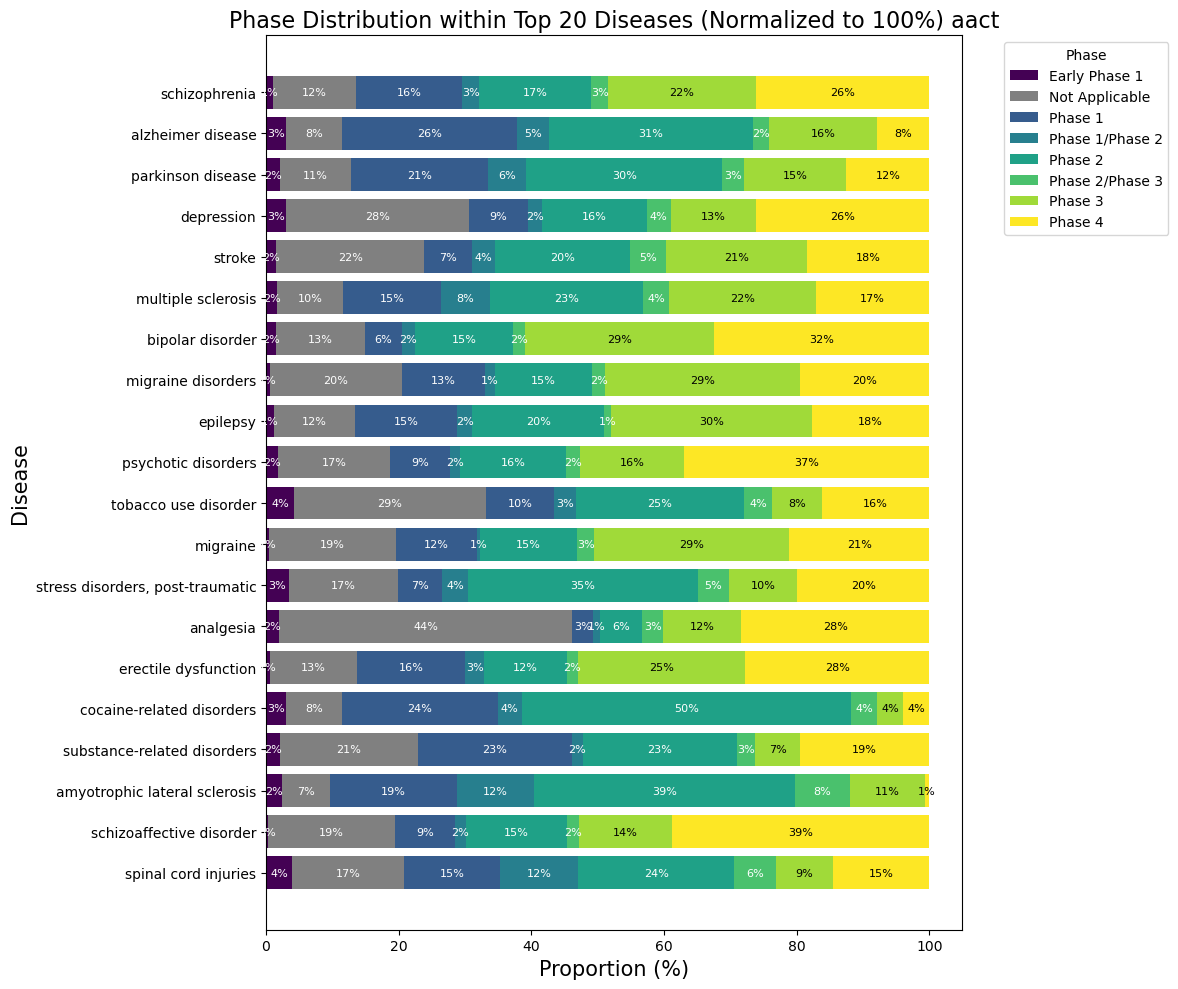

In [137]:
# Proceed with the pivoting, normalization, and plotting as before, using the filtered dataset

# Pivot the filtered data to have diseases as rows and phases as columns, filling missing values with 0
pivot_df_filtered = disease_phase_counts.pivot(index='Neurological Disease', columns='phase', values='nct_id').fillna(0)

# Calculate total trials per disease to identify the top 20 diseases
pivot_df_filtered['Total Trials'] = pivot_df_filtered.sum(axis=1)
top_20_diseases_filtered = pivot_df_filtered.sort_values('Total Trials', ascending=False).head(20)

# Drop the 'Total Trials' column as it's no longer needed for plotting
top_20_diseases_filtered = top_20_diseases_filtered.drop(columns='Total Trials')

# Normalize phase counts to proportions within each disease
normalized_phases_filtered = top_20_diseases_filtered.div(top_20_diseases_filtered.sum(axis=1), axis=0) * 100

# Reverse the row order of normalized_phases to have the largest on top
normalized_phases_filtered_reversed = normalized_phases_filtered.iloc[::-1]

# Assuming normalized_phases_filtered_reversed is prepared and contains the data to be plotted
# Convert the DataFrame to a numpy array for easier iteration in plotting
data_array = normalized_phases_filtered_reversed.to_numpy()

# The y-axis positions for each disease
y_positions = np.arange(len(normalized_phases_filtered_reversed))

# Setting up the plot
fig, ax = plt.subplots(figsize=(12, 10))

# Colors for each phase, assuming a limited number of phases
colors = plt.cm.viridis(np.linspace(0, 1, normalized_phases_filtered_reversed.shape[1]))

# Cumulative array to keep track of where to start the next bar segment
cumulative = np.zeros(len(normalized_phases_filtered_reversed))

for i, (phase_name, color) in enumerate(zip(normalized_phases_filtered_reversed.columns, colors)):
    #print(phase_name)
    # The height of the bar for this phase
    phase_data = data_array[:, i]
    
    # Plotting the bar segment
    if phase_name == 'Not Applicable':
        ax.barh(y_positions, phase_data, color='grey', left=cumulative, edgecolor='none', label=phase_name)
    else:
        ax.barh(y_positions, phase_data, color=color, left=cumulative, edgecolor='none', label=phase_name)
    
    # Updating the cumulative sum for the next bar segment
    cumulative += phase_data
    
    # Adding text labels within each bar segment
    for y, (x_position, width) in enumerate(zip(cumulative, phase_data)):
        if width > 0:  # Only add labels for visible segments
            label_color = 'black' if phase_name in ['Phase 3', 'Phase 4'] else 'white'
            label = f'{width:.0f}%'
            ax.text(x_position - width / 2, y, label, va='center', ha='center', color=label_color, fontsize=8)


# Setting the y-ticks to correspond to diseases
ax.set_yticks(y_positions)
ax.set_yticklabels(normalized_phases_filtered_reversed.index)

plt.xlabel('Proportion (%)', fontsize=15)
plt.ylabel('Disease', fontsize=15)
plt.title(f'Phase Distribution within Top 20 Diseases (Normalized to 100%) {annotations_type}', fontsize=16)
plt.legend(title='Phase', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig(f'viz/disease_phase_proportions_{annotations_type}.png')

plt.show()


## Disease/ Time

In [138]:
# Keeping only unique nct_id, phase pairs
unique_pairs = aact_diseases[['nct_id', 'Neurological Disease']].drop_duplicates()

# Counting the number of nct_ids per phase type
disease_counts = unique_pairs['Neurological Disease'].value_counts()
disease_counts = disease_counts.sort_values(ascending=False).head(10)
disease_counts

Neurological Disease
schizophrenia          1529
alzheimer disease      1275
parkinson disease      1089
depression              905
stroke                  697
multiple sclerosis      653
bipolar disorder        596
migraine disorders      563
epilepsy                486
psychotic disorders     444
Name: count, dtype: int64

In [139]:
aact_diseases_top_10 = aact_diseases[aact_diseases['Neurological Disease'].isin(disease_counts.index)]
aact_diseases_top_10 = aact_diseases_top_10[['nct_id', 'Neurological Disease','start_year']].drop_duplicates()
aact_diseases_top_10_year_count = aact_diseases_top_10.groupby(['start_year', 'Neurological Disease']).size().reset_index(name='count')
aact_diseases_top_10_year_count

,start_year,Neurological Disease,count
0,1982.0,stroke,1
1,1985.0,stroke,1
2,1987.0,depression,4
3,1987.0,psychotic disorders,1
4,1988.0,depression,1
...,...,...,...
312,2024.0,stroke,8
313,2025.0,alzheimer disease,2
314,2025.0,migraine disorders,1
315,2025.0,schizophrenia,1


In [140]:
aact_diseases_top_10_year_count.columns

Index(['start_year', 'Neurological Disease', 'count'], dtype='object')

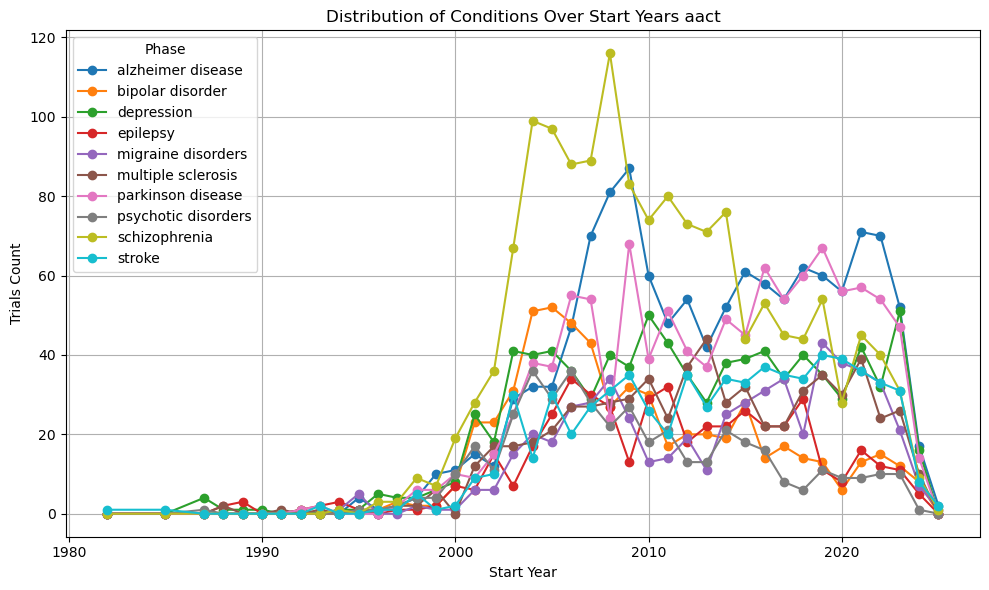

In [141]:
# Group by start_year and phase, count occurrences, and unstack to pivot phase as columns
grouped = aact_diseases_top_10.groupby(['start_year', 'Neurological Disease']).size().unstack(fill_value=0)

# Plot the line chart
grouped.plot(kind='line', marker='o', figsize=(10, 6))

# Set the title and labels
plt.title(f'Distribution of Conditions Over Start Years {annotations_type}')
plt.xlabel('Start Year')
plt.ylabel('Trials Count')

# Show the plot
plt.legend(title='Phase')
plt.grid(True)
plt.tight_layout()

plt.savefig(f"viz/disease_over_time_{annotations_type}.png")
plt.show()

# Interventions

In [142]:
aact_disease_intervention = reference_data[['nct_id', 'Neurological Disease', 'Disease Class', 'intervention_name', 'intervention_type', 'phase', 'overall_status']]

In [143]:
#filtered_df = aact_disease_intervention[(aact_disease_intervention['intervention_type'] == 'Drug') | (aact_disease_intervention['intervention_type'] == 'Biological')]
#filtered_df = aact_disease_intervention[(aact_disease_intervention['intervention_name'] != 'Saline') & (aact_disease_intervention['intervention_type'] != 'Normal saline')]
#filtered_df.head(10)

In [144]:
aact_disease_intervention['intervention_name'].isnull().sum()

12265

In [145]:
aact_disease_intervention.dropna(subset=['intervention_name'], inplace=True)
aact_disease_intervention.drop(aact_disease_intervention[aact_disease_intervention['intervention_name'] == ''].index, inplace=True)

/var/folders/nd/2fzvhsh510gbt9x6z5pdb1gr0000gn/T/ipykernel_51075/1519962836.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aact_disease_intervention.dropna(subset=['intervention_name'], inplace=True)
/var/folders/nd/2fzvhsh510gbt9x6z5pdb1gr0000gn/T/ipykernel_51075/1519962836.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aact_disease_intervention.drop(aact_disease_intervention[aact_disease_intervention['intervention_name'] == ''].index, inplace=True)


In [146]:
aact_disease_intervention['intervention_name'].isnull().sum()

0

In [147]:
len(set(reference_data['nct_id'])), len(set(aact_disease_intervention['nct_id']))

(19607, 18497)

/var/folders/nd/2fzvhsh510gbt9x6z5pdb1gr0000gn/T/ipykernel_51075/3461222991.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aact_disease_intervention['intervention_name'] = aact_disease_intervention['intervention_name'].str.capitalize()


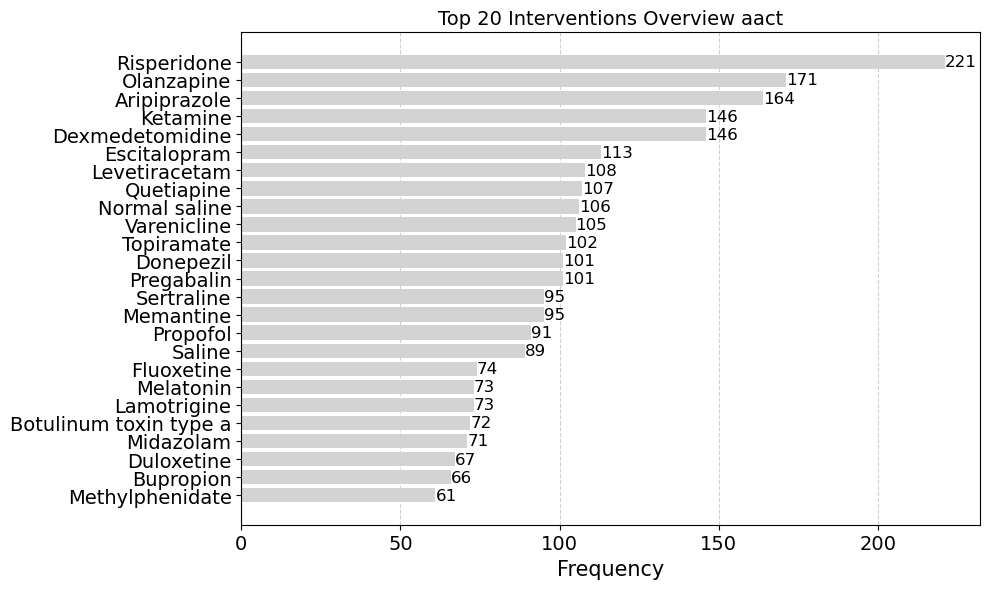

In [148]:
#filtered_df = filtered_df[~filtered_df['intervention_name'].str.contains('placebo', case=False, regex=True)]
#filtered_df = filtered_df[~filtered_df['intervention_name'].str.contains('saline', case=False, regex=True)]

aact_disease_intervention['intervention_name'] = aact_disease_intervention['intervention_name'].str.capitalize()

# Keeping only unique nct_id, phase pairs
unique_pairs = aact_disease_intervention[['nct_id', 'intervention_name']].drop_duplicates()

# Counting the number of nct_ids per phase type
phase_type_counts = unique_pairs['intervention_name'].value_counts()
phase_type_counts = phase_type_counts.sort_values(ascending=True).tail(25)

# Create a horizontal bar chart for the top 10 data types
plt.figure(figsize=(10, 6))
bars = plt.barh(phase_type_counts.index, phase_type_counts, color='lightgrey',zorder=2)

# Add labels to each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, f'{width}', va='center', fontsize=12)
    
plt.tick_params(axis='y', labelsize=14)
plt.tick_params(axis='x', labelsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.6, zorder=1)
plt.xlabel('Frequency', fontsize=15)
plt.title(f'Top 20 Interventions Overview {annotations_type}', fontsize=14)
#plt.xlim(0, 200) # Adjusted to max count for relevancy
plt.tight_layout()

# Save the plot to a local folder
plt.savefig(f'viz/interventions_frequency_{annotations_type}.png')

# Display the chart
plt.show()

In [149]:
# Aggregate trials by disease and phase, counting unique nct_ids
intervention_phase_counts = aact_disease_intervention.groupby(['intervention_name', 'phase'])['nct_id'].nunique().reset_index()

#intervention_phase_counts_filtered = intervention_phase_counts[intervention_phase_counts['phase'] != 'Not Applicable']

# Pivot the filtered data to have interventions as rows and phases as columns
pivot_intervention_df_filtered = intervention_phase_counts.pivot(index='intervention_name', columns='phase', values='nct_id').fillna(0)

# Calculate total trials per intervention again without 'Not Applicable' phase
pivot_intervention_df_filtered['Total Trials'] = pivot_intervention_df_filtered.sum(axis=1)
top_interventions_filtered = pivot_intervention_df_filtered.sort_values('Total Trials', ascending=False).head(20)
top_interventions_filtered

phase,Early Phase 1,Not Applicable,Phase 1,Phase 1/Phase 2,Phase 2,Phase 2/Phase 3,Phase 3,Phase 4,Total Trials
intervention_name,,,,,,,,,
Risperidone,1.0,26.0,13.0,3.0,30.0,3.0,63.0,82.0,221.0
Olanzapine,1.0,22.0,5.0,4.0,18.0,1.0,45.0,75.0,171.0
Aripiprazole,1.0,18.0,10.0,3.0,15.0,3.0,47.0,67.0,164.0
Dexmedetomidine,4.0,35.0,5.0,4.0,10.0,6.0,17.0,65.0,146.0
Ketamine,10.0,21.0,25.0,11.0,36.0,7.0,7.0,29.0,146.0
Escitalopram,2.0,21.0,4.0,0.0,3.0,6.0,20.0,57.0,113.0
Levetiracetam,0.0,15.0,2.0,5.0,26.0,2.0,32.0,26.0,108.0
Quetiapine,0.0,14.0,3.0,2.0,9.0,4.0,23.0,52.0,107.0
Normal saline,4.0,29.0,5.0,7.0,18.0,7.0,8.0,28.0,106.0


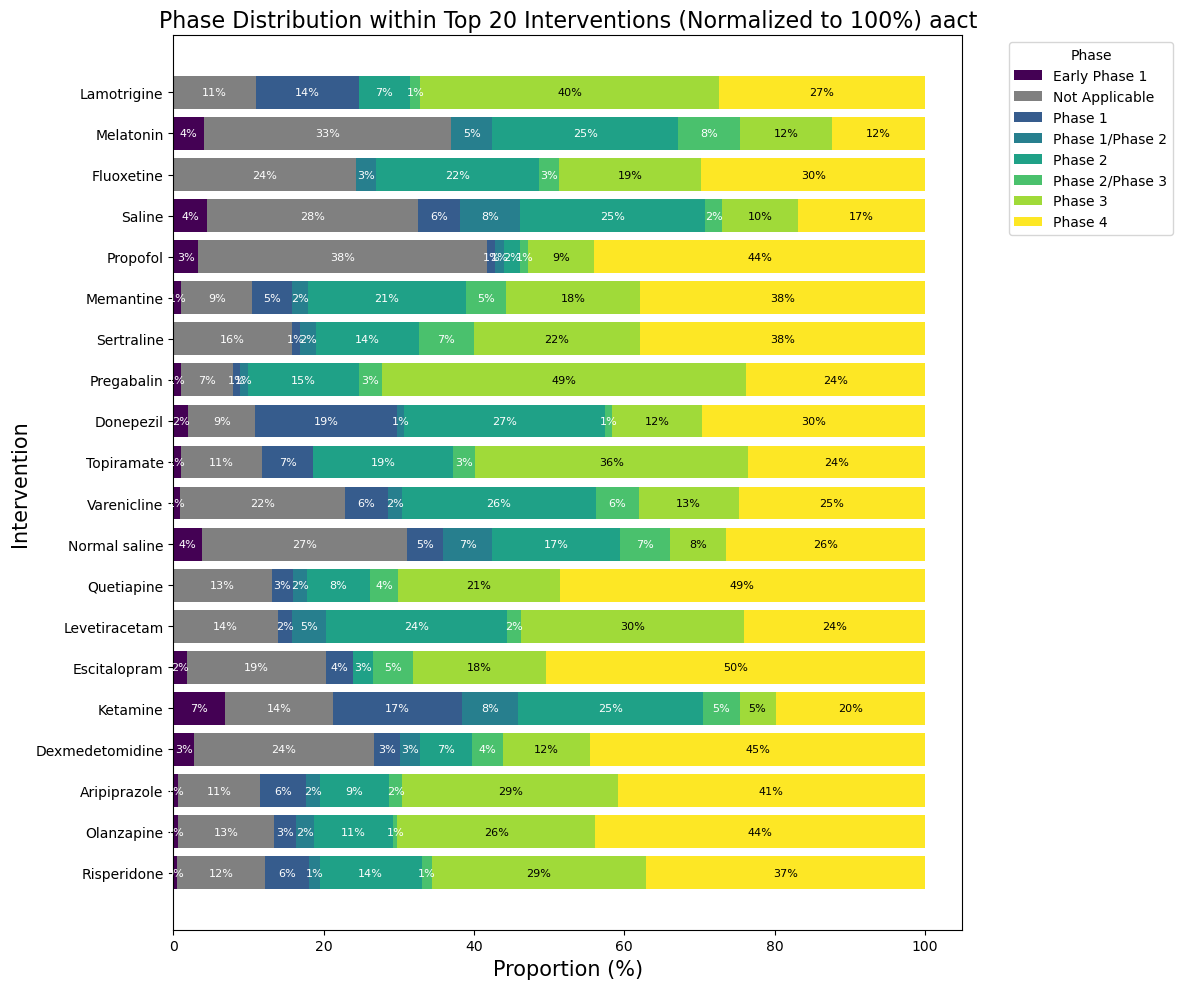

In [150]:
# Step 1: Exclude 'Not Applicable' phase from the analysis
#intervention_phase_counts_filtered = intervention_phase_counts #[intervention_phase_counts['phase'] != 'Not Applicable']

# Pivot the filtered data to have interventions as rows and phases as columns
#pivot_intervention_df_filtered = intervention_phase_counts_filtered.pivot(index='intervention_name', columns='phase', values='nct_id').fillna(0)

# Calculate total trials per intervention again without 'Not Applicable' phase
pivot_intervention_df_filtered['Total Trials'] = pivot_intervention_df_filtered.sum(axis=1)
top_interventions_filtered = pivot_intervention_df_filtered.sort_values('Total Trials', ascending=False).head(20)

# Drop the 'Total Trials' column for plotting
top_interventions_filtered = top_interventions_filtered.drop(columns='Total Trials')

# Normalize phase counts to proportions within each intervention
normalized_phases_intervention_filtered = top_interventions_filtered.div(top_interventions_filtered.sum(axis=1), axis=0) * 100

# Convert the DataFrame to a numpy array for plotting
data_array = normalized_phases_intervention_filtered.to_numpy()
y_positions = np.arange(len(normalized_phases_intervention_filtered))

# Plotting
fig, ax = plt.subplots(figsize=(12, 10))
colors = plt.cm.viridis(np.linspace(0, 1, normalized_phases_intervention_filtered.shape[1]))
cumulative = np.zeros(len(normalized_phases_intervention_filtered))

for i, (phase_name, color) in enumerate(zip(normalized_phases_intervention_filtered.columns, colors)):
    phase_data = data_array[:, i]
    # Plotting the bar segment
    if phase_name == 'Not Applicable':
        ax.barh(y_positions, phase_data, color='grey', left=cumulative, edgecolor='none', label=phase_name)
    else:
        ax.barh(y_positions, phase_data, color=color, left=cumulative, edgecolor='none', label=phase_name)
    #ax.barh(y_positions, phase_data, color=color, left=cumulative, edgecolor='none', label=phase_name)
    
    cumulative += phase_data
    for y, (x_position, width) in enumerate(zip(cumulative, phase_data)):
        label_color = 'black' if phase_name in ['Phase 3', 'Phase 4'] else 'white'
        label = f'{width:.0f}%' if width > 0 else ''
        ax.text(x_position - width / 2, y, label, va='center', ha='center', color=label_color, fontsize=8)

ax.set_yticks(y_positions)
ax.set_yticklabels(normalized_phases_intervention_filtered.index)
plt.xlabel('Proportion (%)', fontsize=15)
plt.ylabel('Intervention', fontsize=15)
plt.title(f'Phase Distribution within Top 20 Interventions (Normalized to 100%) {annotations_type}', fontsize=16)
plt.legend(title='Phase', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig(f'viz/intervention_phase_proportions_{annotations_type}.png')

plt.show()


## Intervention/ Disease

/var/folders/nd/2fzvhsh510gbt9x6z5pdb1gr0000gn/T/ipykernel_51075/4276423969.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_unique['disease_intervention_pair'] = filtered_df_unique['Neurological Disease'] + ' - ' + filtered_df_unique['intervention_name']


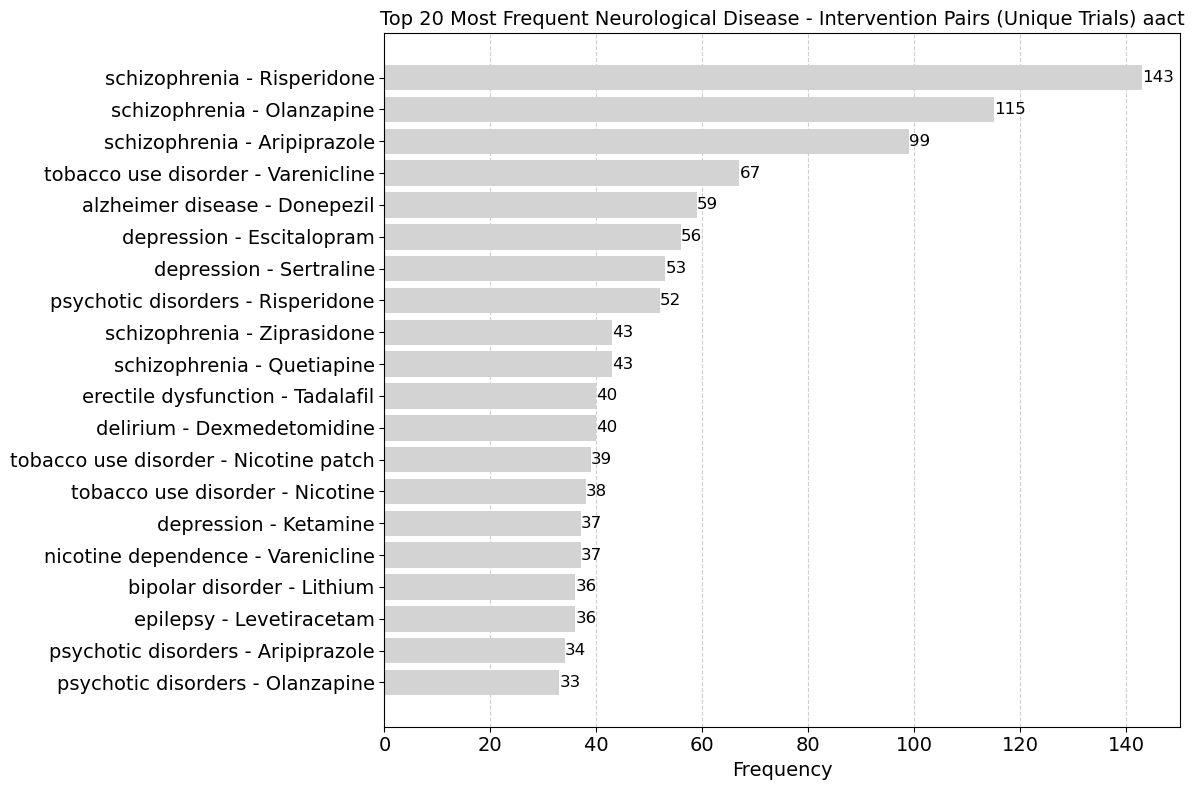

In [151]:
filtered_df = aact_disease_intervention.copy()

# Normalize 'intervention_name' to start with a capital letter
filtered_df['intervention_name'] = filtered_df['intervention_name'].str.capitalize()

# Drop duplicates based on 'nct_id' to ensure uniqueness
filtered_df_unique = filtered_df.drop_duplicates(subset=['nct_id', 'Neurological Disease', 'intervention_name'])

# Create pairs of unique 'nct_id'
filtered_df_unique['disease_intervention_pair'] = filtered_df_unique['Neurological Disease'] + ' - ' + filtered_df_unique['intervention_name']

# Count the frequency of each unique pair
pair_counts_unique = filtered_df_unique['disease_intervention_pair'].value_counts()

# Select the top 20 most frequent pairs
top_20_pairs_unique = pair_counts_unique.head(20).sort_values(ascending=True)  # Sort ascending for plot layout

# Plot with specified formatting
plt.figure(figsize=(12, 8))
bars = plt.barh(top_20_pairs_unique.index, top_20_pairs_unique, color='lightgrey', zorder=2)

# Add labels to each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, f'{width}', va='center', fontsize=12)

plt.tick_params(axis='y', labelsize=14)
plt.tick_params(axis='x', labelsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.6, zorder=1)
plt.xlabel('Frequency', fontsize=14)
plt.title(f'Top 20 Most Frequent Neurological Disease - Intervention Pairs (Unique Trials) {annotations_type}', fontsize=14)
plt.tight_layout()


# Save the plot to a local folder
plt.savefig(f'viz/disease_intervention_pair_frequency_{annotations_type}.png')

plt.show()


In [152]:
disease_intervenion_pairs = filtered_df_unique[['nct_id', 'disease_intervention_pair']].drop_duplicates()

In [153]:
disease_intervenion_pairs.to_csv(f"./analysis/disease_intervenion_pairs_{annotations_type}.csv")


In [91]:
# Step 1: Drop duplicates based on 'nct_id' and 'intervention_name'
unique_interventions_df = filtered_df[['nct_id', 'intervention_name', 'Neurological Disease']].drop_duplicates()

# Step 2: Identify the top 10 interventions
top_10_interventions = unique_interventions_df['intervention_name'].value_counts().head(10).index

# Step 3: Create the dictionary for top 10 interventions with unique diseases
intervention_diseases_dict = {}
for intervention in top_10_interventions:
    # Get the unique diseases tested for each intervention
    unique_diseases = set(unique_interventions_df[unique_interventions_df['intervention_name'] == intervention]['Neurological Disease'])
    intervention_diseases_dict[intervention] = unique_diseases

intervention_diseases_dict


{'Ketamine': {', high-risk major surgery',
  '- assisted emergency department procedural sedation',
  '- assisted procedural sedation',
  '- induced hyperalgesia',
  '- induced transient dissociative state',
  '- refractory obsessive-compulsive disorder',
  'abdominal surgery',
  'abuse of alcohol',
  'acute and chronic pain',
  'acute ischemic stroke',
  'acute migraine',
  'acute pain',
  'acute severe brain injury',
  'acute suicidal ideation',
  'acute suicidality',
  'acute tension type headache',
  'acute, severe pain',
  'acutely elevated suicide risk',
  'acutely suicidal',
  'adenotonsillectomy',
  'aggressive behavior',
  'agitation',
  'alcohol',
  'alcohol abuse',
  'alcohol dependence',
  'alcohol use disorder',
  'amputation',
  'analgesia',
  'aneurysm',
  'aneurysm repair',
  'aneurysmal subarachnoid hemorrhage',
  'anhedonia',
  'anorexia',
  'anorexic',
  'antidepressant',
  'antidepressant resistant ptsd',
  'anxiety',
  'anxiety disorders',
  'anxiety, separation',


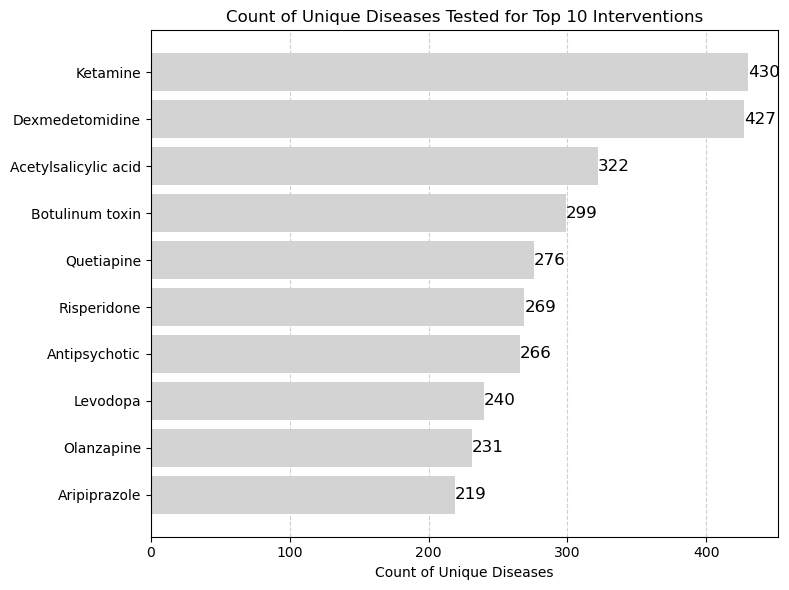

In [92]:
# Calculate unique diseases count for each intervention
unique_diseases_counts = [len(diseases) for diseases in intervention_diseases_dict.values()]
# Extract the interventions list for ordering
interventions = list(intervention_diseases_dict.keys())

# Sort interventions by the count of unique diseases in descending order
sorted_indices = sorted(range(len(unique_diseases_counts)), key=lambda i: unique_diseases_counts[i], reverse=False)
sorted_interventions = [interventions[i] for i in sorted_indices]
sorted_unique_diseases_counts = [unique_diseases_counts[i] for i in sorted_indices]

# Plotting with sorted data
plt.figure(figsize=(8, 6))
bars = plt.barh(sorted_interventions, sorted_unique_diseases_counts, color='lightgrey', zorder=2)

# Add labels to each bar
for bar, count in zip(bars, sorted_unique_diseases_counts):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{count}', va='center', fontsize=12)

plt.xlabel('Count of Unique Diseases')
#plt.ylabel('Intervention')
plt.title('Count of Unique Diseases Tested for Top 10 Interventions')
plt.tight_layout()

# Include grid lines on the x-axis
plt.grid(axis='x', linestyle='--', alpha=0.6, zorder=1)

plt.show()


# Comparison aact vs bert

In [93]:
df = pd.read_excel("data/quality_checks/biolinkbert_annotations_sample2_50_reviewed.xlsx")

In [94]:
df.head()

,nct_id,canonical_aact_interventions,canonical_BioLinkBERT-base_interventions,canonical_aact_conditions,canonical_BioLinkBERT-base_conditions,"bert_performance (0: equal, 1: better, 2: worse)",tricky,comment
0,NCT01942161,aripiprazole high (24 - 30 mg/day)|aripiprazol...,aripiprazole,schizophrenia,schizophrenia,1,NaN,NaN
1,NCT02363517,sofosbuvir/ledispasvir fixed dose combination ...,ledipasvir|sofosbuvir,"substance abuse, intravenous|hepatitis c",hepatitis c virus,2,1.0,substance abuse indirectly implied
2,NCT03945279,biib100,biib100,amyotrophic lateral sclerosis,amyotrophic lateral sclerosis,0,NaN,NaN
3,NCT01137110,NaN,levetiracetam,subarachnoid hemorrhage,seizures|subarachnoid hemorrhage,1,NaN,NaN
4,NCT00004418,glyceryl trierucate/glyceryl trioleate,glyceryl trierucate|glyceryl trioleate|lorenzo...,adrenoleukodystrophy,adrenoleukodystrophy,1,NaN,NaN


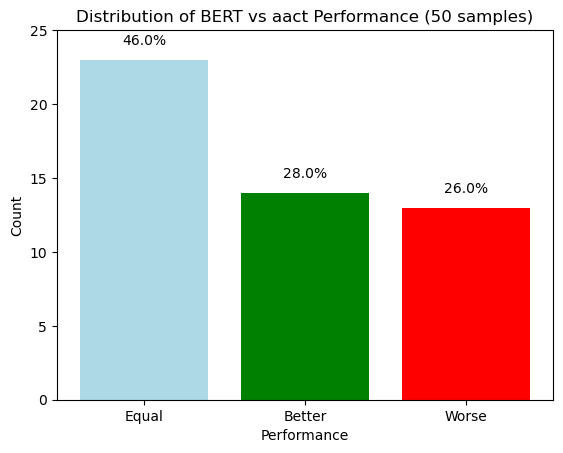

In [98]:
# Group by 'bert_performance' and count occurrences
performance_distribution = df['bert_performance (0: equal, 1: better, 2: worse)'].value_counts()

# Define labels for each category
labels = ['Equal', 'Better', 'Worse']

# Plot the bar chart
plt.bar(labels, performance_distribution, color=['lightblue', 'green', 'red'])

# Calculate the percentage of each category
total_count = performance_distribution.sum()
percentages = [count / total_count * 100 for count in performance_distribution]

# Annotate bars with percentages
for i, percentage in enumerate(percentages):
    plt.text(i, performance_distribution[i] + 1, f"{percentage:.1f}%", ha='center')
    
# Set the y-axis limit to reach 30
plt.ylim(0, 25)
# Set the title and labels
plt.title('Distribution of BERT vs aact Performance (50 samples)')
plt.xlabel('Performance')
plt.ylabel('Count')

plt.savefig("viz/bert_vs_aact_manual.png")
# Show the plot
plt.show()

### BERT advantages
- more details
- more specific
- easier to aggregate

In [96]:
df[df['bert_performance (0: equal, 1: better, 2: worse)'] == 1]

,nct_id,canonical_aact_interventions,canonical_BioLinkBERT-base_interventions,canonical_aact_conditions,canonical_BioLinkBERT-base_conditions,"bert_performance (0: equal, 1: better, 2: worse)",tricky,comment
0,NCT01942161,aripiprazole high (24 - 30 mg/day)|aripiprazol...,aripiprazole,schizophrenia,schizophrenia,1,NaN,NaN
3,NCT01137110,NaN,levetiracetam,subarachnoid hemorrhage,seizures|subarachnoid hemorrhage,1,NaN,NaN
4,NCT00004418,glyceryl trierucate/glyceryl trioleate,glyceryl trierucate|glyceryl trioleate|lorenzo...,adrenoleukodystrophy,adrenoleukodystrophy,1,NaN,NaN
5,NCT00829218,type: other,glutamate|msg,fibromyalgia|irritable bowel syndrome,fibromyalgia|ibs|irritable bowel syndrome,1,NaN,NaN
7,NCT00331825,risperidone and olanzapine,olanzapine|risperidone,extrapyramidal syndrome|schizophrenia,eps|neuroleptic-induced acute dystonia|parkins...,1,1.0,extrapyramidal syndrome not in the text
8,NCT03406702,cx-8998,cx-8998,epilepsy,absence seizures|idiopathic generalized epilepsy,1,1.0,only epilepsy missing in bert
10,NCT06100276,amt-162,amt-162|therapy,amyotrophic lateral sclerosis,rapidly progressive als|sod1 amyotrophic later...,1,1.0,abbreviations not well disambiguated
11,NCT00095524,aripiprazole,aripiprazole|olanzapine,schizoaffective disorder|psychotic disorders|b...,overweight|psychotic disorders|schizoaffective...,1,NaN,NaN
16,NCT01957774,thr-18,alteplase|thr-18|tissue plasminogen activator,stroke,acute ischemic stroke|ischemic strokes|stroke,1,NaN,NaN
27,NCT01883505,levodopa and carbidopa,carbidopa|ld|levodopa|nd0612,parkinson disease,- treated|motor fluctuations|parkinson disease,1,NaN,NaN


### Issues
- main issue: mentions available in other parts of the data, e.g. brief title, detailed trial description
- extractions noise

In [97]:
df[df['bert_performance (0: equal, 1: better, 2: worse)'] == 2]

,nct_id,canonical_aact_interventions,canonical_BioLinkBERT-base_interventions,canonical_aact_conditions,canonical_BioLinkBERT-base_conditions,"bert_performance (0: equal, 1: better, 2: worse)",tricky,comment
1,NCT02363517,sofosbuvir/ledispasvir fixed dose combination ...,ledipasvir|sofosbuvir,"substance abuse, intravenous|hepatitis c",hepatitis c virus,2,1.0,substance abuse indirectly implied
9,NCT00538642,ziprasidone,antipsychotics|ziprasidone,schizoaffective disorder|psychotic disorders|b...,bipolar disorder|diabetes|diabetic|pre-diabeti...,2,1.0,NaN
14,NCT03432871,type: dietary supplement,nicotinamide riboside,progressive external ophthalmoplegia|ophthalmo...,mitochondrial disease|mitochondrial disorders,2,1.0,ophthalmoplegia mentioned only in the detailed...
19,NCT00986115,memantine,memantine,epilepsy,alzheimer disease|epilepsy|seizures,2,1.0,alzheimer disease is a false positive
22,NCT01280006,celecoxib|indomethacin,NaN,stroke|hypertension|cardiovascular diseases|sl...,intermittent hypoxia,2,1.0,Arms and Interventions field of AACT? Missing ...
23,NCT02034474,tocilizumab,il-6 receptor antibody|tocilizumab,schizoaffective disorder|psychotic disorders|s...,"residual positive, negative, and cognitive sym...",2,NaN,NaN
25,NCT01069159,propranolol hydrochloride,propranolol,"stress disorders, post-traumatic|traumatic memory",propranolol treatment of traumatic memories|tr...,2,NaN,NaN
28,NCT00320723,"bupropion, transdermal nicotine patch",bupropion,schizoaffective disorder|psychotic disorders|s...,major mental illness|smoking,2,1.0,schizophrenia mentioned in brief title and det...
34,NCT00242177,actos (pioglitazone),NaN,"multiple sclerosis, relapsing-remitting","multiple sclerosis|multiple sclerosis, relapsi...",2,1.0,drug was mentioned in the detailed description
35,NCT01453127,i-123 ioflupane solution injection prior to sp...,NaN,rem sleep behavior disorder|dementia|parkinson...,alzheimer disease|dementia with lewy bodies|mi...,2,1.0,drug was mentioned in the detailed description


## disease-intervention pairs

In [195]:
pairs_aact = pd.read_csv("./analysis/disease_intervenion_pairs_aact.csv", index_col=0)
pairs_aact['disease_intervention_pair'] = pairs_aact['disease_intervention_pair'].str.lower()

pairs_bert = pd.read_csv("./analysis/disease_intervenion_pairs_biolinkbert.csv", index_col=0)
pairs_bert['disease_intervention_pair'] = pairs_bert['disease_intervention_pair'].str.lower()


In [197]:
grouped_df_aact = pairs_aact.groupby('disease_intervention_pair').agg(
    nct_ids_aact=('nct_id', list),              # Create a list of nct_ids
    count_nct_ids_aact=('nct_id', 'nunique')    # Count unique nct_ids
).reset_index()
grouped_df_aact = grouped_df_aact.sort_values(by='count_nct_ids_aact', ascending=False)
grouped_df_aact

,disease_intervention_pair,nct_ids_aact,count_nct_ids_aact
34660,schizophrenia - risperidone,"[NCT00000374, NCT00006195, NCT00014001, NCT000...",143
34433,schizophrenia - olanzapine,"[NCT00000374, NCT00001656, NCT00006195, NCT000...",115
33904,schizophrenia - aripiprazole,"[NCT00036127, NCT00036361, NCT00044655, NCT000...",99
39688,tobacco use disorder - varenicline,"[NCT00502216, NCT00507728, NCT00548470, NCT005...",67
1582,alzheimer disease - donepezil,"[NCT00000173, NCT00006399, NCT00018278, NCT000...",59
...,...,...,...
14620,fever - pcv13,[NCT03165981],1
14621,fever after vaccination - dtap,[NCT03165981],1
14622,fever after vaccination - iiv,[NCT03165981],1
14623,fever after vaccination - pcv13,[NCT03165981],1


In [198]:
grouped_df_bert = pairs_bert.groupby('disease_intervention_pair').agg(
    nct_ids_bert=('nct_id', list),              # Create a list of nct_ids
    count_nct_ids_bert=('nct_id', 'nunique')    # Count unique nct_ids
).reset_index()
grouped_df_bert = grouped_df_bert.sort_values(by='count_nct_ids_bert', ascending=False)


In [199]:
grouped_df_bert

,disease_intervention_pair,nct_ids_bert,count_nct_ids_bert
48197,parkinson disease - levodopa,"[NCT00004576, NCT00004733, NCT00006077, NCT000...",193
57666,schizophrenia - risperidone,"[NCT00000267, NCT00006195, NCT00014001, NCT000...",174
57155,schizophrenia - antipsychotic,"[NCT00000371, NCT00005658, NCT00006195, NCT000...",152
57564,schizophrenia - olanzapine,"[NCT00001656, NCT00006195, NCT00007774, NCT000...",134
57165,schizophrenia - aripiprazole,"[NCT00036361, NCT00088049, NCT00095524, NCT001...",97
...,...,...,...
24630,excessive weight gain - octreotide,[NCT00175305],1
24631,excessive weight gain - somatostatin,[NCT00175305],1
24632,exchange - citrate,[NCT01370200],1
24633,exchange - trisodium citrate,[NCT01370200],1


In [206]:
# Merge the DataFrames on 'disease_intervention_pair'
merged_df = pd.merge(grouped_df_aact, grouped_df_bert, on='disease_intervention_pair', how='outer')

# Function to calculate intersections and differences
def calculate_overlaps(row):
    ids_a = set(row['nct_ids_aact']) if isinstance(row['nct_ids_aact'], list) else set()
    ids_b = set(row['nct_ids_bert']) if isinstance(row['nct_ids_bert'], list) else set()
    return pd.Series({
        'overlap_count': len(ids_a & ids_b),
        'unique_aact_count': len(ids_a - ids_b),
        'unique_bert_count': len(ids_b - ids_a)
    })

# Apply the function
merged_df[['overlap_count', 'unique_aact_count', 'unique_bert_count']] = merged_df.apply(calculate_overlaps, axis=1)


In [210]:
merged_df['combined_frq'] = merged_df['overlap_count'] + merged_df['unique_aact_count'] + merged_df['unique_bert_count']
merged_df = merged_df.sort_values(by='combined_frq', ascending=False)


In [211]:
merged_df

,disease_intervention_pair,nct_ids_aact,count_nct_ids_aact,nct_ids_bert,count_nct_ids_bert,overlap_count,unique_aact_count,unique_bert_count,combined_frq
86374,schizophrenia - risperidone,"[NCT00000374, NCT00006195, NCT00014001, NCT000...",143.0,"[NCT00000267, NCT00006195, NCT00014001, NCT000...",174.0,80,63,94,237
72075,parkinson disease - levodopa,"[NCT00004733, NCT00096720, NCT00153972, NCT004...",22.0,"[NCT00004576, NCT00004733, NCT00006077, NCT000...",193.0,15,7,178,200
86086,schizophrenia - olanzapine,"[NCT00000374, NCT00001656, NCT00006195, NCT000...",115.0,"[NCT00001656, NCT00006195, NCT00007774, NCT000...",134.0,64,51,70,185
85298,schizophrenia - antipsychotic,[NCT00931996],1.0,"[NCT00000371, NCT00005658, NCT00006195, NCT000...",152.0,0,1,152,153
85317,schizophrenia - aripiprazole,"[NCT00036127, NCT00036361, NCT00044655, NCT000...",99.0,"[NCT00036361, NCT00088049, NCT00095524, NCT001...",97.0,52,47,45,144
...,...,...,...,...,...,...,...,...,...
14533,boo - prazosin,NaN,NaN,[NCT00602186],1.0,0,0,1,1
14532,bony hip surgery - botulinum toxin type a,NaN,NaN,[NCT01437644],1.0,0,0,1,1
14531,bony hip surgery - botulinum toxin,NaN,NaN,[NCT01437644],1.0,0,0,1,1
14577,borderline personality disorder - rapid-acting...,NaN,NaN,[NCT03395314],1.0,0,0,1,1


In [217]:
# Sorting the DataFrame by 'combined_frq' and selecting the top 20
top_df = merged_df.sort_values(by='combined_frq', ascending=False).head(20)

# Calculate proportions scaled to 100
top_df['total'] = top_df['overlap_count'] + top_df['unique_aact_count'] + top_df['unique_bert_count']
top_df['overlap_pct'] = (top_df['overlap_count'] / top_df['total']) * 100
top_df['unique_aact_pct'] = (top_df['unique_aact_count'] / top_df['total']) * 100
top_df['unique_bert_pct'] = (top_df['unique_bert_count'] / top_df['total']) * 100
top_df

,disease_intervention_pair,nct_ids_aact,count_nct_ids_aact,nct_ids_bert,count_nct_ids_bert,overlap_count,unique_aact_count,unique_bert_count,combined_frq,total,overlap_pct,unique_aact_pct,unique_bert_pct
86374,schizophrenia - risperidone,"[NCT00000374, NCT00006195, NCT00014001, NCT000...",143.0,"[NCT00000267, NCT00006195, NCT00014001, NCT000...",174.0,80,63,94,237,237,33.755274,26.582278,39.662447
72075,parkinson disease - levodopa,"[NCT00004733, NCT00096720, NCT00153972, NCT004...",22.0,"[NCT00004576, NCT00004733, NCT00006077, NCT000...",193.0,15,7,178,200,200,7.500000,3.500000,89.000000
86086,schizophrenia - olanzapine,"[NCT00000374, NCT00001656, NCT00006195, NCT000...",115.0,"[NCT00001656, NCT00006195, NCT00007774, NCT000...",134.0,64,51,70,185,185,34.594595,27.567568,37.837838
85298,schizophrenia - antipsychotic,[NCT00931996],1.0,"[NCT00000371, NCT00005658, NCT00006195, NCT000...",152.0,0,1,152,153,153,0.000000,0.653595,99.346405
85317,schizophrenia - aripiprazole,"[NCT00036127, NCT00036361, NCT00044655, NCT000...",99.0,"[NCT00036361, NCT00088049, NCT00095524, NCT001...",97.0,52,47,45,144,144,36.111111,32.638889,31.250000
5958,alzheimer disease - donepezil,"[NCT00000173, NCT00006399, NCT00018278, NCT000...",59.0,"[NCT00000173, NCT00030979, NCT00035204, NCT000...",69.0,22,37,47,106,106,20.754717,34.905660,44.339623
27977,depression - ketamine,"[NCT00088699, NCT00749203, NCT01046630, NCT012...",37.0,"[NCT00088699, NCT01306760, NCT01367119, NCT015...",75.0,21,16,54,91,91,23.076923,17.582418,59.340659
86314,schizophrenia - quetiapine,"[NCT00014001, NCT00018642, NCT00018668, NCT000...",43.0,"[NCT00014001, NCT00018642, NCT00034892, NCT000...",62.0,16,27,46,89,89,17.977528,30.337079,51.685393
80177,psychotic disorders - risperidone,"[NCT00034775, NCT00108368, NCT00169988, NCT001...",52.0,"[NCT00034762, NCT00034892, NCT00053703, NCT001...",51.0,21,31,30,82,82,25.609756,37.804878,36.585366
27798,depression - escitalopram,"[NCT00071643, NCT00073411, NCT00073697, NCT000...",56.0,"[NCT00114374, NCT00136318, NCT00140257, NCT001...",44.0,18,38,26,82,82,21.951220,46.341463,31.707317


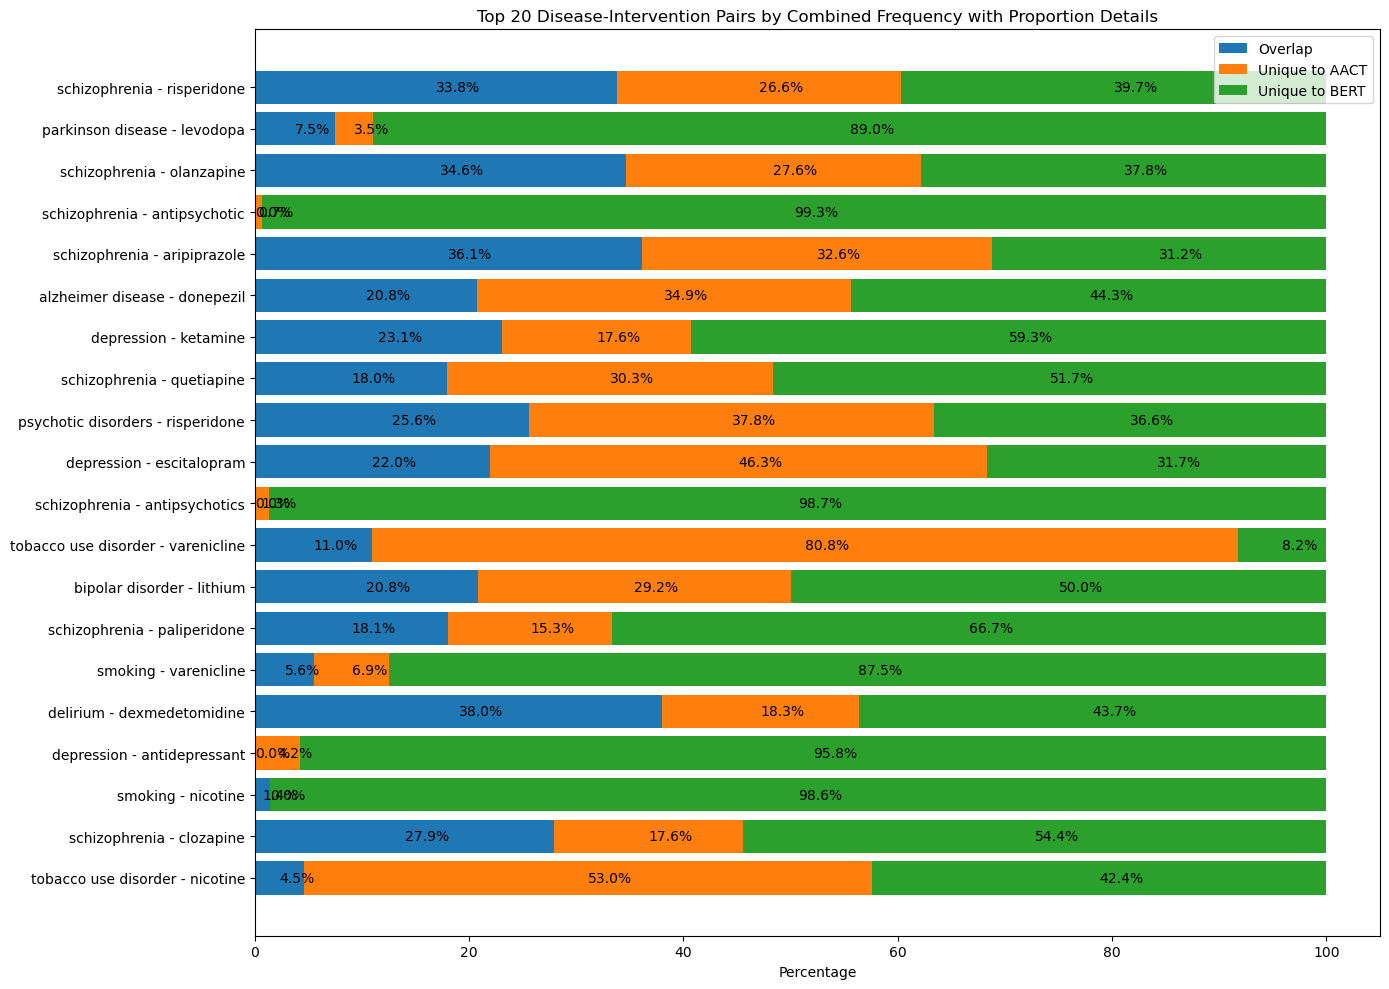

In [220]:
# Plotting
fig, ax = plt.subplots(figsize=(14, 10))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Define color scheme
bars_overlap = ax.barh(top_df['disease_intervention_pair'], top_df['overlap_pct'], color=colors[0], label='Overlap')
bars_unique_aact = ax.barh(top_df['disease_intervention_pair'], top_df['unique_aact_pct'], left=top_df['overlap_pct'], color=colors[1], label='Unique to AACT')
bars_unique_bert = ax.barh(top_df['disease_intervention_pair'], top_df['unique_bert_pct'], left=top_df['overlap_pct'] + top_df['unique_aact_pct'], color=colors[2], label='Unique to BERT')

# Add labels to the bars
def add_labels(bars):
    for bar in bars:
        width = bar.get_width()
        label_x_pos = bar.get_x() + width / 2
        ax.text(label_x_pos, bar.get_y() + bar.get_height() / 2, f'{width:.1f}%', va='center')

add_labels(bars_overlap)
add_labels(bars_unique_aact)
add_labels(bars_unique_bert)

# Invert y-axis to have the first item at the top
ax.invert_yaxis()

ax.set_xlabel('Percentage')
ax.set_title('Top 20 Disease-Intervention Pairs by Combined Frequency with Proportion Details')
ax.set_yticks(range(len(top_df)))
ax.set_yticklabels(top_df['disease_intervention_pair'])
ax.legend()
plt.tight_layout()
plt.savefig(f'viz/bert_vs_aacts_drug_disease_pairs_nctids.png')

plt.show()